In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
os.listdir('/gdrive/MyDrive')

['elasticity.txt',
 'CV_van15.gdoc',
 'Lettre de recommandation Lincence pro carto.gdoc',
 'Document sans titre (5).gdoc',
 'Notes de cours.gdoc',
 'CEGO20200123091813_MAIL_ComRodH01337763730 (1).rtf.gdoc',
 'CEGO20200123091813_MAIL_ComRodH01337763730.rtf.gdoc',
 'fiches produit.gdoc',
 'gross_sales_2020-03-31_2020-06-28.csv',
 'sales_2020-03-31_2020-06-28.csv',
 '.td-3',
 'crash_log_2.txt',
 '.tdck',
 'crash_log_3.txt',
 'crash_log_1.txt',
 'Copie de Shareholder Template (1).gdoc',
 'Shareholder Template.gdoc',
 'Copie de Shareholder Template.gdoc',
 'Formulaire - LC - V25062020.gdoc',
 'Business Plan Template.gslides',
 'Conditions ParticulieÃÄres - LC Hizi workout - Marchand - Master - V070720....gdoc',
 'Copie de Business Plan Template.gslides',
 'world_population.csv',
 'bis.xlsx',
 "Plan+d'apprentissage+personnaliseÃÅ (2) (1).gsheet",
 "Plan d'apprentissage formation Data Analyst.gsheet",
 "Plan+d'apprentissage+personnaliseÃÅ (2).gsheet",
 "Copie de Plan+d'apprentissage+personnal

**Contexte**

Employ√© dans une banque, pr√©sente dans de nombreux pays √† travers le monde. Celle-ci souhaite cibler de nouveaux clients potentiels particuli√®rement les jeunes en √¢ge d'ouvrir leur tout premier compte bancaire.

Cependant, elle souhaite cibler **les prospects les plus susceptibles d'avoir, plus tard dans leur vie, de hauts revenus**.

L'ojectif est de cr√©er un mod√®le permettant de d√©terminer le revenu potentiel d'une personne.

"Quelles informations avons-nous ?" Uniquement le revenu des parents, car nous allons cibler les enfants de nos clients actuels, ainsi que le pays o√π ils habitent. Et une derni√®re chose : ce mod√®le doit √™tre valable pour la plupart des pays du monde.

Le mod√®le propos√© sera une r√©gression lin√©aire avec 3 variables :

le revenu des parents (nos clients actuels);
le revenu moyen du pays dans lequel habite le prospect;
l'indice de Gini calcul√© sur les revenus des habitants du pays en question.
L'unit√© utilis√©e dans la colonne income de la World Income Distribution est le $PPP. Cette unit√© est calcul√©e par la Banque mondiale, selon la m√©thode Elt√∂te-K√∂ves-Szulc.


La population de l'√©chantillon a √©t√© d√©coup√©e en quantiles.
Nous appellerons ici chaque quantile une classe de revenu. Ainsi, la valeur de la colonne income pour un quantile donn√© peut √™tre vu comme le revenu moyen des personnes appartenant √† la classe de revenu correspondante √† ce quantile.

Ici les donn√©es de la World Income Distribution pr√©sentent pour chaque pays les centiles de la distribution des revenus de leur population respective.

**Analyse et traitement des donn√©es**

In [ ]:
#Librairies Python pour le traitement des donn√©es
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.api as sms

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster, metrics
from sklearn.metrics import pairwise_distances_argmin_min
from statsmodels.graphics.gofplots import ProbPlot

%pylab inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Style graphique utilis√© pour les visualisations
plt.style.use('ggplot')

In [ ]:
#Chargement de la base des donn√©es 'world_income_distribution.csv'
#Fichier de la World Income Distribution
data = pd.read_csv('/gdrive/MyDrive/world_income_distribution.csv', decimal=",")
display(data.head())
display(data.shape)

country  year_survey  quantile  nb_quantiles      income  gdpppp
0     ALB         2008         1           100   728.89795  7297.0
1     ALB         2008         2           100   916.66235  7297.0
2     ALB         2008         3           100  1010.91600  7297.0
3     ALB         2008         4           100  1086.90780  7297.0
4     ALB         2008         5           100  1132.69970  7297.0

(11599, 6)

In [ ]:
'/gdrive/MyDrive/notes.csv'

'/gdrive/MyDrive/notes.csv'

In [ ]:
#Nombre de pays recens√©s dans le dataset "data"
print(str(len(data['country'].unique())) + ' Pays dans notre liste de correspondance code pays / Pays')
print('et ' + str(data.duplicated().sum()) + ' doublon, les pays sont bien distincts.')

116 Pays dans notre liste de correspondance code pays / Pays
et 0 doublon, les pays sont bien distincts.


**Note** : Chaque pays doit disposer de 100 quantiles, "data" renvoie 116 pays pour 11599 observations, il manque un quantile dans les donn√©es.

**Identification du pays / quantile manquant**

In [ ]:
#Agr√©gation des donn√©es selon les pays, puis application de la  fonction .nunique()
data_nunique = data.groupby('country').nunique()
data_nunique[data_nunique['quantile'] < 100]

year_survey  quantile  nb_quantiles  income  gdpppp
country                                                     
LTU                1        99             1      99       1

In [ ]:
#Visualisation des 99 individus du pays 'LTU'
with pd.option_context('display.max_rows', 100):
    print(data[data.country == 'LTU'])

     country  year_survey  quantile  nb_quantiles      income   gdpppp
6200     LTU         2008         1           100    566.3453  17571.0
6201     LTU         2008         2           100   1147.0587  17571.0
6202     LTU         2008         3           100   1490.8408  17571.0
6203     LTU         2008         4           100   1746.5715  17571.0
6204     LTU         2008         5           100   1842.9542  17571.0
6205     LTU         2008         6           100   1925.8641  17571.0
6206     LTU         2008         7           100   2048.3857  17571.0
6207     LTU         2008         8           100   2173.7112  17571.0
6208     LTU         2008         9           100   2302.0857  17571.0
6209     LTU         2008        10           100   2361.6480  17571.0
6210     LTU         2008        11           100   2452.7578  17571.0
6211     LTU         2008        12           100   2602.3857  17571.0
6212     LTU         2008        13           100   2732.9660  17571.0
6213  

L'information manquante concerne le pays Lituanie Quantile 41.

In [ ]:
#Calcul du quantile manquant (41)par la moyenne des quantiles -1 et +1 (40 et 42)
ltu_41 = data.loc[(data['country'] == 'LTU') & (data['quantile'] == 40) 
                  | (data['country'] == 'LTU') & (data['quantile'] == 42)]['income'].mean()
ltu_41

4882.14065

In [ ]:
#Cr√©ation de la ligne manquante pour le pays 'LTU' & son quantile '41'
ltu_41_row = pd.DataFrame({'country': ['LTU'], 'year_survey': [2008], 'quantile': [41], 
                           'nb_quantiles': [100], 'income': [ltu_41], 'gdpppp': 17571.0})
ltu_41_row

country  year_survey  quantile  nb_quantiles      income   gdpppp
0     LTU         2008        41           100  4882.14065  17571.0

In [ ]:
#Int√©gration de la pr√©c√©dente ligne dans le dataframe "data" (dataframe de d√©part)
data = pd.concat([data, ltu_41_row], ignore_index=True, sort=True)
display(data.shape)
data.head()

(11600, 6)

country  gdpppp      income  nb_quantiles  quantile  year_survey
0     ALB  7297.0   728.89795           100         1         2008
1     ALB  7297.0   916.66235           100         2         2008
2     ALB  7297.0  1010.91600           100         3         2008
3     ALB  7297.0  1086.90780           100         4         2008
4     ALB  7297.0  1132.69970           100         5         2008

In [ ]:
#V√©rification des ann√©es stock√©es dans la variable 'year_survey'
data['year_survey'].sort_values(ascending=True).unique()

array([2004, 2006, 2007, 2008, 2009, 2010, 2011])

In [ ]:
#Cr√©ation d'un √©chantillon de travail, le dataframe "df"
#Deux colonnes seront renomm√©es pour la suite de l'analyse
df = data.copy()
df.rename(columns={'country': 'country_code', 'year_survey': 'year'}, inplace=True)
df

country_code       gdpppp      income  nb_quantiles  quantile  year
0              ALB   7297.00000   728.89795           100         1  2008
1              ALB   7297.00000   916.66235           100         2  2008
2              ALB   7297.00000  1010.91600           100         3  2008
3              ALB   7297.00000  1086.90780           100         4  2008
4              ALB   7297.00000  1132.69970           100         5  2008
...            ...          ...         ...           ...       ...   ...
11595          COD    303.19305   911.78340           100        97  2008
11596          COD    303.19305  1057.80740           100        98  2008
11597          COD    303.19305  1286.60290           100        99  2008
11598          COD    303.19305  2243.12260           100       100  2008
11599          LTU  17571.00000  4882.14065           100        41  2008

[11600 rows x 6 columns]

L'√©chantillon a √©t√© trait√©, le nombre d'individus correspond au nombre des quantiles de chaque pays. Le quantile 41 de LTU est √©galement pr√©sent dans nos donn√©es

**Int√©gration des noms de pays dans le dataset**
Il sera plus facile d'avoir les correpondances pays en face des codes.

In [ ]:
#Enrichissement de l'√©chantillon par l'int√©gration des noms de pays selon leurs codes
#Source https://sql.sh/514-liste-pays-csv-xml
country_list = pd.read_csv('/gdrive/MyDrive/country_list.csv', header=None)
country_list.rename(columns={3:'country_code', 5:'country'}, inplace=True)
country_list = country_list.iloc[:, [3,5]]
country_list.head()

country_code         country
0          AFG     Afghanistan
1          ALB         Albania
2          ATA      Antarctica
3          DZA         Algeria
4          ASM  American Samoa

In [ ]:
#Identification des codes pays pr√©sents dans l'√©chantillon "df" et non dans le r√©f√©rentiel pays "country_list"
l1 = list(df['country_code'].unique())
l2 = list(country_list['country_code'].unique())
[country for country in l1 if country not in l2]

['XKX', 'MNE', 'SRB']

In [ ]:
#Int√©gration de ces 3 pays dans le r√©f√©rentiel pays "country_list"
missing_country = pd.DataFrame([
    ['XKX', 'Kosovo'], 
    ['MNE', 'Montenegro'],
    ['SRB', 'Serbia']], 
    columns=['country_code', 'country'])

country_list = pd.concat([country_list, missing_country], ignore_index=True, axis=0)
country_list.head()


country_code         country
0          AFG     Afghanistan
1          ALB         Albania
2          ATA      Antarctica
3          DZA         Algeria
4          ASM  American Samoa

In [ ]:
#Nombre de pays recens√©s dans "country_list"
print(str(len(country_list)) + ' Pays dans notre liste de correspondance code pays / Pays')
print('et ' + str(country_list.duplicated().sum()) + ' doublon, les pays sont bien distints.')

244 Pays dans notre liste de correspondance code pays / Pays
et 0 doublon, les pays sont bien distints.


In [ ]:
#Int√©gration dans l'√©chantillon "df" des noms de pays selon leur code pays
df = pd.merge(df, country_list, how='left', on='country_code')
df = df[['country_code', 'country', 'year', 'quantile', 'nb_quantiles', 'income', 'gdpppp']]
display(df.head())
display(df.shape)

country_code  country  year  quantile  nb_quantiles      income  gdpppp
0          ALB  Albania  2008         1           100   728.89795  7297.0
1          ALB  Albania  2008         2           100   916.66235  7297.0
2          ALB  Albania  2008         3           100  1010.91600  7297.0
3          ALB  Albania  2008         4           100  1086.90780  7297.0
4          ALB  Albania  2008         5           100  1132.69970  7297.0

(11600, 7)

**Int√©gration des populations**


In [ ]:
#Enrichissement de l'√©chantillon "df" par l'int√©gration des populations par ann√©e
#Source http://www.fao.org/faostat/fr/#data/OA
country_population = pd.read_csv('/gdrive/MyDrive/population_fao.csv')
country_population.rename(columns={'Area':'country', 'Year':'year', 'Value':'population'}, inplace=True)
country_population = country_population.iloc[:, [3, 9, 11]]
country_population['population'] = (country_population['population']*1000)

display(country_population.head())
display(country_population.shape)

country  year  population
0  Afghanistan  2004  24726684.0
1  Afghanistan  2006  26433049.0
2  Afghanistan  2007  27100536.0
3  Afghanistan  2008  27722276.0
4  Afghanistan  2009  28394813.0

(1621, 3)

In [ ]:
#Identification des pays avec diff√©rence d'intitul√© entre "df" et "country_population"
l1 = list(df['country'].unique())
l2 = list(country_population['country'].unique())
[country for country in l1 if country not in l2]

['Bolivia',
 'Central African',
 'Czech Republic',
 'Islamic Republic of Iran',
 'Kosovo',
 'The Former Yugoslav Republic of Macedonia',
 'Sudan',
 'Swaziland',
 'Taiwan',
 'United Republic Of Tanzania',
 'United States',
 'Venezuela',
 'Vietnam',
 'Occupied Palestinian Territory',
 'The Democratic Republic Of The Congo']

In [ ]:
#Fonction de retraitement des noms de pays exposant des √©carts d'intitul√©
def rename_country(country):
    if (country == 'Bolivia (Plurinational State of)'):
        return 'Bolivia'
    elif country == 'Central African Republic':
        return 'Central African'
    elif country == 'Czechia':
        return 'Czech Republic' 
    elif country == 'Iran (Islamic Republic of)':
        return 'Islamic Republic of Iran' 
    elif country == 'North Macedonia':
        return 'The Former Yugoslav Republic of Macedonia' 
    elif country == 'Sudan (former)':
        return 'Sudan' 
    elif country == 'Eswatini':
        return 'Swaziland' 
    elif country == 'China, Taiwan Province of':
        return 'Taiwan'
    elif country == 'United Republic of Tanzania':
        return 'United Republic Of Tanzania' 
    elif country == 'United States of America':
        return 'United States' 
    elif country == 'Venezuela (Bolivarian Republic of)':
        return 'Venezuela' 
    elif country == 'Viet Nam':
        return 'Vietnam'
    elif country == 'Palestine':
        return 'Occupied Palestinian Territory' 
    elif country == 'Congo':
        return 'The Democratic Republic Of The Congo'
    else :
        return country

In [ ]:
#Application de la fonction rename_country()s ur la Series country_population['country']
#Utilisation de la m√©thode .apply()
country_population['country'] = country_population['country'].apply(rename_country)

In [ ]:
#Int√©gration des populations dans l'√©chantillon "df" par m√©thode .merge() selon 'year' et 'country'
df = pd.merge(df, country_population, how='left', on=['year', 'country'])
display(df.head())
display(df.shape)

country_code  country  year  ...      income  gdpppp  population
0          ALB  Albania  2008  ...   728.89795  7297.0   3002678.0
1          ALB  Albania  2008  ...   916.66235  7297.0   3002678.0
2          ALB  Albania  2008  ...  1010.91600  7297.0   3002678.0
3          ALB  Albania  2008  ...  1086.90780  7297.0   3002678.0
4          ALB  Albania  2008  ...  1132.69970  7297.0   3002678.0

[5 rows x 8 columns]

(11600, 8)

In [ ]:
#V√©rification des valeurs manquantes sur la Series 'gdpppp' et 'population'
display(df[df['gdpppp'].isna()]['country_code'].unique())
display(df[df['population'].isna()]['country_code'].unique())

array(['XKX', 'PSE'], dtype=object)

array(['XKX'], dtype=object)

In [ ]:
#Int√©gration des valeurs manquantes 'gdpppp' et 'population' sur le code pays XKX (Kosovo)
#Utilisation de la m√©thode .fillna() avec restriction selon les pays concern√©s
#Source https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2009&locations=XK&start=2008&view=chart
values = {'gdpppp': 7249, 'population': 1747383}
df.iloc[5800:5900, :].fillna(value=values, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Int√©gration de la valeur manquante 'gdpppp' sur le code pays PSE (Occupied Palestinian Territory)
#Source https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2009&locations=XK&start=2008&view=chart
values = {'gdpppp': 3695.0}
df.iloc[11199:11299, :].fillna(value=values, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


**Int√©gration des indices de Gini**


L'indice de Gini fait parti des variables explicatives, il permet de d√©terminer la r√©partition des richesses au sein d'une population d'un pays. Indice compris entre 0 et 1.

In [ ]:
#Chargement des indices de Gini
#Source https://data.worldbank.org/indicator/SI.POV.GINI
gini = pd.read_csv('/gdrive/MyDrive/gini_worlbank.csv', skiprows=4).reset_index()
gini.head()

index                 Country Name Country Code  ...  2018 2019  2020
0      0                        Aruba          ABW  ...   NaN  NaN   NaN
1      1  Africa Eastern and Southern          AFE  ...   NaN  NaN   NaN
2      2                  Afghanistan          AFG  ...   NaN  NaN   NaN
3      3   Africa Western and Central          AFW  ...   NaN  NaN   NaN
4      4                       Angola          AGO  ...  51.3  NaN   NaN

[5 rows x 66 columns]

In [ ]:
#Identification des m√™mes ann√©es que celles de l'√©chantillon "df"
gini_columns = []
for value in gini.columns:
    gini_columns.append(value)
    
gini_vars = [year for year in gini_columns if year in (['2004', '2006', '2007', '2008', '2009', '2010', '2011'])]

In [ ]:
#Mise en forme du dataframe pour obtenir uniquement les indices de Gini disponibles sur les ann√©es ci-dessus
gini_melt = pd.melt(gini, id_vars =['Country Code', 'Country Name'], value_vars = gini_vars, var_name ='year', 
                    value_name ='gini')
gini_melt.rename(columns={'Country Code':'country_code', 'Country Name':'country'}, inplace=True)
gini_melt['gini'] = round(gini_melt['gini']/100, 2)
gini_melt.dropna(inplace=True)
gini_melt['year'] = gini_melt['year'].astype(int)
gini_melt

country_code        country  year  gini
9             ARG      Argentina  2004  0.48
10            ARM        Armenia  2004  0.38
13            AUS      Australia  2004  0.33
14            AUT        Austria  2004  0.30
15            AZE     Azerbaijan  2004  0.27
...           ...            ...   ...   ...
1844          UKR        Ukraine  2011  0.25
1846          URY        Uruguay  2011  0.42
1847          USA  United States  2011  0.41
1857          XKX         Kosovo  2011  0.28
1861          ZWE       Zimbabwe  2011  0.43

[526 rows x 4 columns]

In [ ]:
#Jointure des indices de Gini "gini_melt" avec l'√©chantillon "df"
df = pd.merge(df, gini_melt, how='left', on=['country_code', 'country', 'year'])
df

country_code                               country  ...  population  gini
0              ALB                               Albania  ...   3002678.0  0.30
1              ALB                               Albania  ...   3002678.0  0.30
2              ALB                               Albania  ...   3002678.0  0.30
3              ALB                               Albania  ...   3002678.0  0.30
4              ALB                               Albania  ...   3002678.0  0.30
...            ...                                   ...  ...         ...   ...
11595          COD  The Democratic Republic Of The Congo  ...   4011486.0   NaN
11596          COD  The Democratic Republic Of The Congo  ...   4011486.0   NaN
11597          COD  The Democratic Republic Of The Congo  ...   4011486.0   NaN
11598          COD  The Democratic Republic Of The Congo  ...   4011486.0   NaN
11599          LTU                             Lithuania  ...   3212865.0  0.36

[11600 rows x 9 columns]

Il appara√Æt des valeurs manquantes apr√®s jointure, les indices de Gini pris de la worldbank.org n'√©taient pas exacts, il est donc n√©cessaire d'identifier les NaN dans un premier temps, puis de les calculer afin de les int√©grer‚Ä¶

In [ ]:
#Combien d'indices de Gini manque t-il?
missing_gini = df[df['gini'].isna()][['country_code', 'country', 'year']]
missing_country = list(missing_gini['country_code'].unique())
len(missing_country)

38

In [ ]:
#Listing de ces 37 pays
print(missing_country)

['AZE', 'CAF', 'CAN', 'CHN', 'CIV', 'EGY', 'GHA', 'GTM', 'HRV', 'IND', 'IRN', 'IRQ', 'ISR', 'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LKA', 'MAR', 'MDA', 'MKD', 'MLI', 'MNE', 'MYS', 'NGA', 'PAK', 'SRB', 'SVK', 'SWZ', 'SYR', 'TWN', 'TZA', 'VEN', 'PSE', 'YEM', 'COD']


In [ ]:
#Isolement des pays selon les ann√©es dont l'indice de Gini est manquant
missing_gini = df[df.isna().any(axis=1)].drop_duplicates(subset=['country_code', 'quantile', 'year'])
missing_gini

country_code                               country  ...  population  gini
400            AZE                            Azerbaijan  ...   8821873.0   NaN
401            AZE                            Azerbaijan  ...   8821873.0   NaN
402            AZE                            Azerbaijan  ...   8821873.0   NaN
403            AZE                            Azerbaijan  ...   8821873.0   NaN
404            AZE                            Azerbaijan  ...   8821873.0   NaN
...            ...                                   ...  ...         ...   ...
11594          COD  The Democratic Republic Of The Congo  ...   4011486.0   NaN
11595          COD  The Democratic Republic Of The Congo  ...   4011486.0   NaN
11596          COD  The Democratic Republic Of The Congo  ...   4011486.0   NaN
11597          COD  The Democratic Republic Of The Congo  ...   4011486.0   NaN
11598          COD  The Democratic Republic Of The Congo  ...   4011486.0   NaN

[3800 rows x 9 columns]

In [ ]:
#Calcul des indices de Gini manquants
list_gini = []
for code in missing_gini['country_code'] : 
    dep = missing_gini[missing_gini['country_code'] == code]['income'].values
    n = len(dep)
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()

    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
    S = 0.5 - AUC 
    gini = round(2*S, 2)
    list_gini.append(gini)  

In [ ]:
#Int√©gration des indices de Gini dans le dataframe "find_gini" issu de "missing_gini"
find_gini = missing_gini.copy()
find_gini.loc[:,'gini'] = list_gini
find_gini

country_code                               country  ...  population  gini
400            AZE                            Azerbaijan  ...   8821873.0  0.31
401            AZE                            Azerbaijan  ...   8821873.0  0.31
402            AZE                            Azerbaijan  ...   8821873.0  0.31
403            AZE                            Azerbaijan  ...   8821873.0  0.31
404            AZE                            Azerbaijan  ...   8821873.0  0.31
...            ...                                   ...  ...         ...   ...
11594          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11595          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11596          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11597          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11598          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44

[3800 rows x 9 columns]

In [ ]:
#Int√©gration des valeurs manquantes dans l'√©chantillon de travail "df"
for code in list(find_gini['country_code'].unique()) :
    df.loc[df['country_code'] == code,'gini'] = (find_gini.loc[find_gini['country_code'] == code,'gini'])
    
#Visualisation rapide des donn√©es
df

country_code                               country  ...  population  gini
0              ALB                               Albania  ...   3002678.0  0.30
1              ALB                               Albania  ...   3002678.0  0.30
2              ALB                               Albania  ...   3002678.0  0.30
3              ALB                               Albania  ...   3002678.0  0.30
4              ALB                               Albania  ...   3002678.0  0.30
...            ...                                   ...  ...         ...   ...
11595          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11596          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11597          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11598          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11599          LTU                             Lithuania  ...   3212865.0  0.36

[11600 rows x 9 columns]

**Tous les indices de Gini ont √©t√© int√©gr√©s, aucun pays n'a √©t√© exclu de l'analyse, l'√©chantillon a √©t√© enrichi**

**Vue sur les donn√©es de l'√©chantillon de travail**

In [ ]:
#Rappel de l'√©chantillon final "df" apr√®s retraitement des donn√©es
display(df.head())
display(df.tail())
display(df.shape)

country_code  country  year  quantile  ...      income  gdpppp  population  gini
0          ALB  Albania  2008         1  ...   728.89795  7297.0   3002678.0   0.3
1          ALB  Albania  2008         2  ...   916.66235  7297.0   3002678.0   0.3
2          ALB  Albania  2008         3  ...  1010.91600  7297.0   3002678.0   0.3
3          ALB  Albania  2008         4  ...  1086.90780  7297.0   3002678.0   0.3
4          ALB  Albania  2008         5  ...  1132.69970  7297.0   3002678.0   0.3

[5 rows x 9 columns]

country_code                               country  ...  population  gini
11595          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11596          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11597          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11598          COD  The Democratic Republic Of The Congo  ...   4011486.0  0.44
11599          LTU                             Lithuania  ...   3212865.0  0.36

[5 rows x 9 columns]

(11600, 9)

In [ ]:
#V√©rification des √©ventuelles valeurs manquantes et/ou doublons dans l'√©chantillon "df"
display(df.isna().any())
display(df.duplicated().sum())

country_code    False
country         False
year            False
quantile        False
nb_quantiles    False
income          False
gdpppp          False
population      False
gini            False
dtype: bool

0

In [ ]:
#Visualisation rapide du type de variables 
df.dtypes

country_code     object
country          object
year              int64
quantile          int64
nb_quantiles      int64
income          float64
gdpppp          float64
population      float64
gini            float64
dtype: object

In [ ]:
#Description rapide des variables quantitatives
df.describe().T

count          mean  ...           75%           max
year          11600.0  2.007983e+03  ...  2.008000e+03  2.011000e+03
quantile      11600.0  5.050000e+01  ...  7.525000e+01  1.000000e+02
nb_quantiles  11600.0  1.000000e+02  ...  1.000000e+02  1.000000e+02
income        11600.0  6.069122e+03  ...  7.515314e+03  1.769285e+05
gdpppp        11600.0  4.944692e+04  ...  1.819625e+04  4.300332e+06
population    11600.0  5.346517e+07  ...  3.904949e+07  1.376266e+09
gini          11600.0  3.769828e-01  ...  4.300000e-01  6.300000e-01

[7 rows x 8 columns]

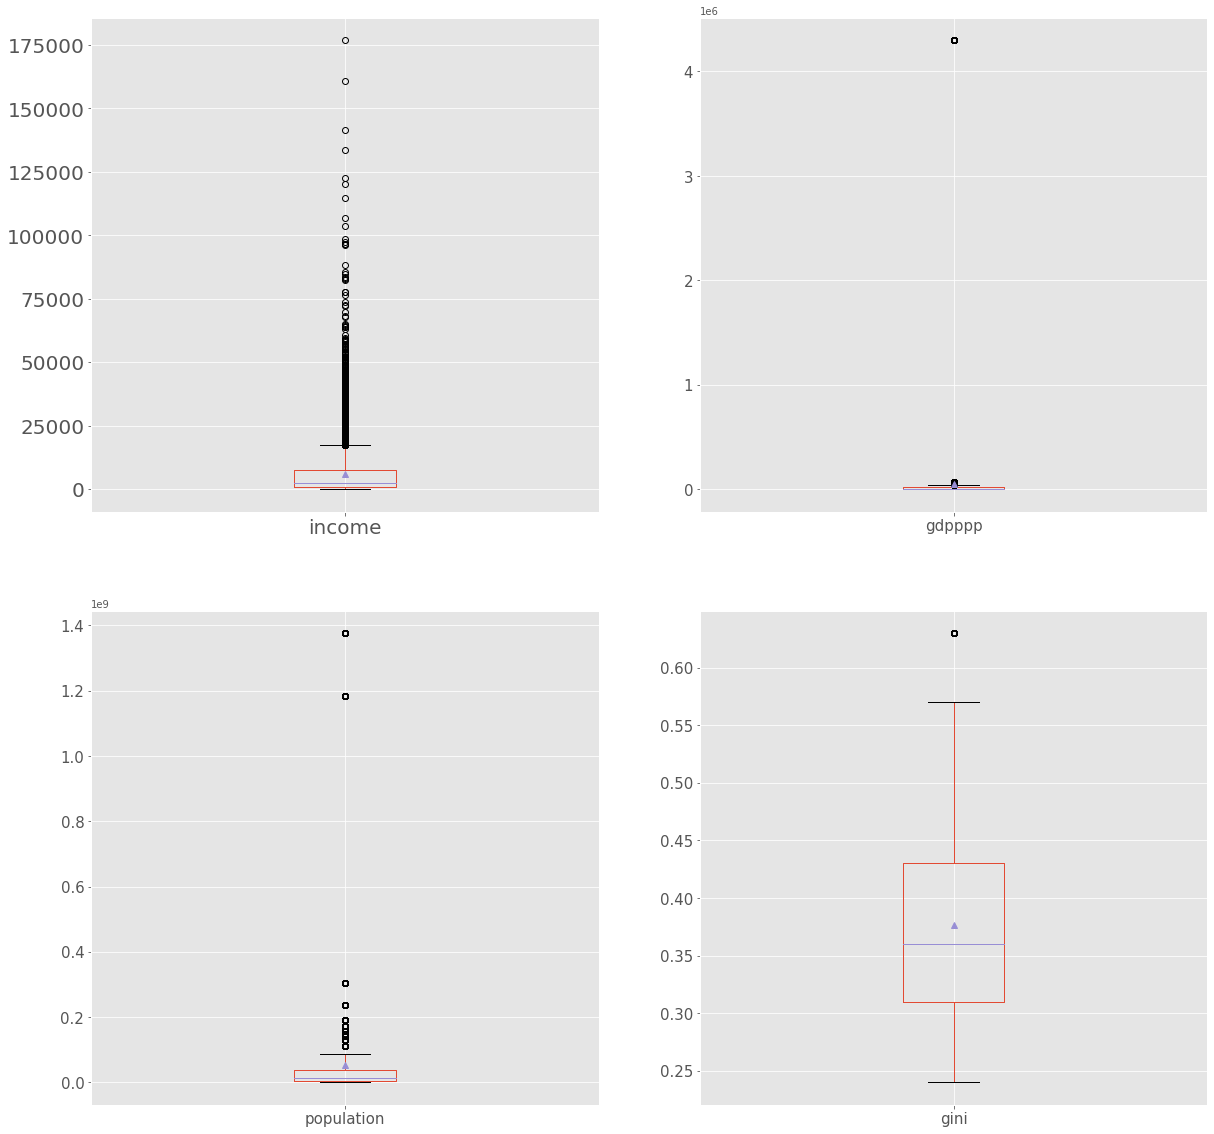

In [ ]:
#Approche visuelle par Boxplot de la distribution des variables et des √©ventuels outliers
plt.figure(figsize=(20, 20))

plt.subplot(221)
df.iloc[:, [5]].boxplot(fontsize=20, widths=0.2, showmeans=True)
plt.subplot(222)
df.iloc[:, [6]].boxplot(fontsize=15, widths=0.2, showmeans=True)
plt.subplot(223)
df.iloc[:, [7]].boxplot(fontsize=15, widths=0.2, showmeans=True)
plt.subplot(224)
df.iloc[:, [8]].boxplot(fontsize=15, widths=0.2, showmeans=True)

plt.savefig('variables_boxplot.jpg')
plt.show()

In [ ]:
#Identification de quelques outliers afin de v√©rifier que ces valeurs puissent √™tre possibles
display(df.sort_values(by='population', ascending=False).iloc[:1, :])
display(df.sort_values(by='gdpppp', ascending=False).iloc[:1, :])
display(df.sort_values(by='gini', ascending=False).iloc[:1, :])

country_code country  year  quantile  ...    income  gdpppp    population  gini
1798          CHN   China  2007        99  ...  11071.51  5712.0  1.376266e+09  0.48

[1 rows x 9 columns]

country_code country  year  ...     gdpppp  population  gini
3200          FJI    Fiji  2008  ...  4300332.0    845361.0   0.4

[1 rows x 9 columns]

country_code       country  year  ...  gdpppp  population  gini
11471          ZAF  South Africa  2008  ...  9602.0  49779471.0  0.63

[1 rows x 9 columns]

Les outliers sont des valeurs tout √† fait coh√©rentes avec leur pays d'affectation.

**Bilan des pays et des populations dans l'√©chantillon**

In [ ]:
#Identification du nombre de pays par ann√©e 
#Recherche des ann√©es les plus repr√©sentatives‚Ä¶
demography_group = df[['year', 'country']].drop_duplicates().groupby('year').count().reset_index()
demography_group.rename(columns={'country':'country_quantity'}, inplace=True)
demography_group

year  country_quantity
0  2004                 1
1  2006                 5
2  2007                15
3  2008                76
4  2009                12
5  2010                 6
6  2011                 1

In [ ]:
#Int√©gration de la population selon les ann√©es de l'analyse
#M√©thode .groupby() avec une somme des populations car nous avons une classification par quantile
pop_year = pd.DataFrame(df[df['quantile'] == 1].groupby(['year'])['population'].sum(), dtype=int).reset_index()
pop_year

year  population
0  2004    17827825
1  2006   287548000
2  2007  2750266740
3  2008  2271976191
4  2009   475559459
5  2010   383832444
6  2011    14948801

In [ ]:
#Int√©gration de la population mondiale par ann√©e
#Source https://donnees.banquemondiale.org/indicateur/SP.POP.TOTL
world_population = pd.read_csv('/gdrive/MyDrive/world_population.csv', skiprows=3)
world_population = world_population[['Country Name', '2004', '2006', '2007', '2008', '2009', '2010', '2011']]
world_population = world_population[world_population['Country Name'] == 'Monde'].T.reset_index()
world_population.drop(world_population.index[0], inplace=True)
world_population.rename(columns={'index': 'year', 257: 'pop_world'}, inplace=True)

world_population = world_population.astype(int)
world_population

year   pop_world
1  2004  6432374971
2  2006  6593623202
3  2007  6675130418
4  2008  6757887172
5  2009  6840591577
6  2010  6922947261
7  2011  7004011262

In [ ]:
#Merge des populations avec pourcentage de la part mondiale
#Recherche des ann√©es les plus repr√©sentatives‚Ä¶
tab = pd.merge(demography_group, pop_year, on='year')
tab = pd.merge(tab, world_population, on='year')
tab['%world_pop'] = round((tab['population']/tab['pop_world']*100), 2)
tab

year  country_quantity  population   pop_world  %world_pop
0  2004                 1    17827825  6432374971        0.28
1  2006                 5   287548000  6593623202        4.36
2  2007                15  2750266740  6675130418       41.20
3  2008                76  2271976191  6757887172       33.62
4  2009                12   475559459  6840591577        6.95
5  2010                 6   383832444  6922947261        5.54
6  2011                 1    14948801  7004011262        0.21

2007 et 2008 sont les deux seules ann√©es repr√©sentatives de l'√©chantillon.

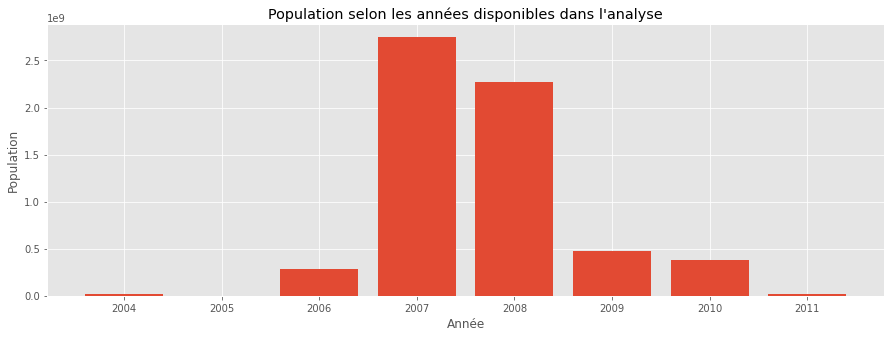

In [ ]:
#Visualisation 
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(tab['year'], tab['population'])

plt.xlabel('Ann√©e')
plt.ylabel('Population')
plt.title("Population selon les ann√©es disponibles dans l'analyse")

plt.savefig('population_diagramme.jpg')
plt.show()

**Aalyse‚Ä¶**

Les ann√©es pris en compte vont de 2004 √† 2011 (2005 non repr√©sent√©e).
Une forte concentration sur les ann√©es 2007 et 2008.

116 pays sont repr√©sent√©s dans l'√©chantillon.

Les quantiles utilis√©s pour l'ensemble des pays, par la World Income Distribution, sont des centiles (aussi appel√©s percentiles ).

La m√©thode des centiles permet de r√©duire la taille de l'√©chantillon, tout en pr√©servant suffisamment d'informations pour pouvoir l'analyser.

Le $PPP est une unit√© qui permet de comparer le pouvoir d'achat entre deux pays sans distorsion due aux taux de change.

**MISSION 2**

**√âtude de la diversit√© des pays**

Le but est de montrer la diversit√© des pays en termes de distribution de revenus √† l'aide d'un graphique. Celui-ci repr√©sentera le revenu moyen (axe des ordonn√©es, sur une √©chelle logarithmique) de chacune des classes de revenu (axe des abscisses) pour 5 √† 10 pays choisis pour montrer leur diversit√©.

Il est √©galement n√©cessaire de repr√©senter la courbe de Lorenz de chacun des pays choisis. Pour chacun de ces pays, faut aussi pr√©ciser l'√©volution de l'indice de Gini au fil des ans. Les pays seront class√©s par indice de Gini. Enfin il faut pr√©senter la moyenne des 5 pays ayant l'indice de Gini le plus √©lev√© et les 5 pays ayant l'indice de Gini le plus faible. Quelle position occupe la France ?

In [ ]:
#Rappel de l'√©chantillon "df" trait√© dans l'analyse
df.head()

country_code  country  year  quantile  ...      income  gdpppp  population  gini
0          ALB  Albania  2008         1  ...   728.89795  7297.0   3002678.0   0.3
1          ALB  Albania  2008         2  ...   916.66235  7297.0   3002678.0   0.3
2          ALB  Albania  2008         3  ...  1010.91600  7297.0   3002678.0   0.3
3          ALB  Albania  2008         4  ...  1086.90780  7297.0   3002678.0   0.3
4          ALB  Albania  2008         5  ...  1132.69970  7297.0   3002678.0   0.3

[5 rows x 9 columns]

In [ ]:
#Calcul du revenu moyen du pays dans lequel habite notre prospect
df_income_avg = df[['country_code','income']].groupby('country_code').mean().reset_index()
df_income_avg.rename(columns={'income':'income_avg'}, inplace=True)
df = df.merge(df_income_avg, how='left', on='country_code')
display(df.shape)
display(df.head()) 

(11600, 10)

country_code  country  year  quantile  ...  gdpppp  population  gini   income_avg
0          ALB  Albania  2008         1  ...  7297.0   3002678.0   0.3  2994.829902
1          ALB  Albania  2008         2  ...  7297.0   3002678.0   0.3  2994.829902
2          ALB  Albania  2008         3  ...  7297.0   3002678.0   0.3  2994.829902
3          ALB  Albania  2008         4  ...  7297.0   3002678.0   0.3  2994.829902
4          ALB  Albania  2008         5  ...  7297.0   3002678.0   0.3  2994.829902

[5 rows x 10 columns]

Il nous faut par la suite r√©duire la dimension de nos donn√©es afin de faciliter l'analyse. **Le partionnement sera fait √† l'aide d'un algorithme non-supervis√©, le k-means.**

In [ ]:
#Clustering fait √† partir d'une copie de l'√©chantillon, ici nomm√©e "df_clustering"
df_clustering = df.copy()
df_clustering = df_clustering[df_clustering['country'] != 'Fiji'] 

La visualisation pr√©c√©dente des distributions de nos variables avait expos√©e quelques outliers. **Le pays Fiji sera exclu du clustering car sa valeur du gdpppp est tr√®s influente.**

In [ ]:
#Transformation en array Numpy
#Indexation selon les pays par la fonction .set_index()
df_clustering.set_index('country', inplace=True)
df_clustering.head()

country_code  year  quantile  ...  population  gini   income_avg
country                               ...                               
Albania          ALB  2008         1  ...   3002678.0   0.3  2994.829902
Albania          ALB  2008         2  ...   3002678.0   0.3  2994.829902
Albania          ALB  2008         3  ...   3002678.0   0.3  2994.829902
Albania          ALB  2008         4  ...   3002678.0   0.3  2994.829902
Albania          ALB  2008         5  ...   3002678.0   0.3  2994.829902

[5 rows x 9 columns]

In [ ]:
#Par simplification (gain en temps de calcul), le clustering sera fait sur le premier quantile
#Suppression des lignes par m√©thode .drop_duplicates()
df_clustering.drop_duplicates(subset=['country_code'], inplace=True)
df_clustering

country_code  year  ...  gini    income_avg
country                                                  ...                    
Albania                                       ALB  2008  ...  0.30   2994.829902
Argentina                                     ARG  2008  ...  0.45   5847.884654
Armenia                                       ARM  2008  ...  0.29   1628.382785
Austria                                       AUT  2008  ...  0.30  16637.600204
Azerbaijan                                    AZE  2008  ...  0.31   2357.429023
...                                           ...   ...  ...   ...           ...
Vietnam                                       VNM  2006  ...  0.36   1377.773966
Occupied Palestinian Territory                PSE  2009  ...  0.36   1114.098514
Yemen                                         YEM  2008  ...  0.37   1042.635870
South Africa                                  ZAF  2008  ...  0.63   5617.904880
The Democratic Republic Of The Congo          COD  2008  ...  0.44    276.016044

[115 rows x 9 columns]

In [ ]:
#Pr√©paration des donn√©es pour le clustering K-Means
#Ici le clustering sera √©tabli sur les valeurs des variables 'gdpppp' et 'gini'
X = df_clustering.loc[:, ['gdpppp', 'gini']].values
Y = df_clustering.index

display(X.shape)
display(Y.shape)

(115, 2)

(115,)

Le .shape permet de **v√©rifier que les 116 pays (moins le pays Fiji) sont toujours dans les donn√©es √† clusteriser, y compris les deux variables descriptives.**

In [ ]:
#Index des donn√©es d√©sormais bas√© sur les noms des 115 pays
df_clustering.index

Index(['Albania', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bosnia and Herzegovina',
       ...
       'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Venezuela', 'Vietnam',
       'Occupied Palestinian Territory', 'Yemen', 'South Africa',
       'The Democratic Republic Of The Congo'],
      dtype='object', name='country', length=115)

In [ ]:
#Centrage / r√©duction des donn√©es (n√©cessaire pour √©viter les d√©calages d'√©chelle)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

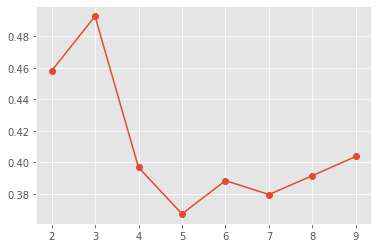

In [ ]:
#Calcul  de la m√©trique "silhouette" pour diff√©rents nombres de groupes issus de la m√©thode des centres mobiles
#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle it√©rative de 2 √† 10 (clusters) pour tester les possibilit√©s
for k in range(2, 10): 
    #Cr√©ation et ajustement d'un mod√®le pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associ√©s
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.savefig('country_kmeans.jpg')
plt.show()

**Un k=3 est pertinent pour la r√©alisation du clustering **texte en gras**

In [ ]:
#Clustering K-Means en 3 clusters, introduction de notre mod√®le 'cls'
cls = cluster.KMeans(n_clusters=3)
cls.fit(X_scaled)

KMeans(n_clusters=3)

In [ ]:
#Tableau des Centro√Ødes: 3 clusters dans sa version centr√©e r√©duite
#Comparaison simplifi√©e, les dimensions prenant la m√™me importance!
centroids = cls.cluster_centers_
pd.DataFrame(centroids, columns=['gdpppp', 'gini'], index=['cluster0', 'cluster1', 'cluster2'])

gdpppp      gini
cluster0 -0.464604  1.224121
cluster1  1.597383 -0.763262
cluster2 -0.468108 -0.489378

In [ ]:
#Index tri√© des clusters
idk = np.argsort(cls.labels_)

#Affichage des observations selon leurs clusters
df_cls = pd.DataFrame(df_clustering.index[idk], cls.labels_[idk]).reset_index()
df_cls = df_cls.rename(columns={'index':'cluster'})

In [ ]:
#Int√©gration des clusters dans notre dataframe "df_cls" par la m√©thode .merge()
#Jointure avec le dataframe initial selon les pays et condition 'inner'
df_cls = pd.merge(df_clustering, df_cls, on='country')
df_cls.head()

country country_code  year  ...  gini    income_avg  cluster
0     Albania          ALB  2008  ...  0.30   2994.829902        2
1   Argentina          ARG  2008  ...  0.45   5847.884654        0
2     Armenia          ARM  2008  ...  0.29   1628.382785        2
3     Austria          AUT  2008  ...  0.30  16637.600204        1
4  Azerbaijan          AZE  2008  ...  0.31   2357.429023        2

[5 rows x 11 columns]

In [ ]:
#Taille des 3 clusters, combien de pays dans chaque?
print(str(len(df_cls[df_cls['cluster'] == 0])) + " clusters dans la premi√®re partition")
print(str(len(df_cls[df_cls['cluster'] == 1])) + " clusters dans la seconde partition")
print(str(len(df_cls[df_cls['cluster'] == 2])) + " clusters dans la troisi√®me partition")

37 clusters dans la premi√®re partition
26 clusters dans la seconde partition
52 clusters dans la troisi√®me partition


In [ ]:
#Pays du cluster 0
print(list(df_cls[df_cls['cluster'] == 0]['country']))

['Argentina', 'Bolivia', 'Brazil', 'Central African', 'Chile', 'China', "C√¥te d'Ivoire", 'Cameroon', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'Ghana', 'Guatemala', 'Honduras', 'Islamic Republic of Iran', 'Morocco', 'Madagascar', 'Mexico', 'Mozambique', 'Malawi', 'Malaysia', 'Nigeria', 'Nicaragua', 'Panama', 'Peru', 'Philippines', 'Paraguay', 'Russian Federation', 'El Salvador', 'Swaziland', 'Thailand', 'Uganda', 'Uruguay', 'Venezuela', 'South Africa', 'The Democratic Republic Of The Congo']


In [ ]:
#Pays du cluster 1
print(list(df_cls[df_cls['cluster'] == 1]['country']))

['Austria', 'Belgium', 'Canada', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Finland', 'France', 'United Kingdom', 'Greece', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands', 'Norway', 'Portugal', 'Slovakia', 'Slovenia', 'Sweden', 'Taiwan', 'United States']


In [ ]:
#Pays du cluster 2
print(list(df_cls[df_cls['cluster'] == 2]['country']))

['Albania', 'Armenia', 'Azerbaijan', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Bhutan', 'Egypt', 'Estonia', 'Georgia', 'Guinea', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Iraq', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Cambodia', 'Republic of Korea', 'Kosovo', "Lao People's Democratic Republic", 'Liberia', 'Sri Lanka', 'Lithuania', 'Latvia', 'Republic of Moldova', 'The Former Yugoslav Republic of Macedonia', 'Mali', 'Montenegro', 'Mongolia', 'Mauritania', 'Niger', 'Nepal', 'Pakistan', 'Poland', 'Romania', 'Sudan', 'Serbia', 'Syrian Arab Republic', 'Tajikistan', 'Timor-Leste', 'Turkey', 'United Republic Of Tanzania', 'Ukraine', 'Vietnam', 'Occupied Palestinian Territory', 'Yemen']


Choix **des pays du cluster 1, car le gdpppp est plus important que pour les autres partitions, mais √©galement un indice de gini tr√®s √©loign√© de 1 indiquant une meilleure r√©partition des revenus.**

In [ ]:
#Affichage des pays les plus contributeurs avec restriction selon le cluster 0
di = np.sum(X_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame({'c_inertie':di, 'country':df_clustering.index, 
                                  'country_code': df_cls['country_code'], 'cluster': df_cls['cluster'], 
                                  'gdpppp': df_cls['gdpppp'], 'gini': df_cls['gini']}).sort_values(by='c_inertie',
                                                                                                   ascending=False)
ctr_indiv_inertie[ctr_indiv_inertie['cluster'] == 1]

c_inertie         country country_code  cluster   gdpppp  gini
62   21.617993      Luxembourg          LUX        1  73127.0  0.33
80    9.467295          Norway          NOR        1  49070.0  0.27
108   5.649672   United States          USA        1  43261.0  0.41
25    5.135412         Denmark          DNK        1  34130.0  0.25
79    4.923471     Netherlands          NLD        1  38065.0  0.29
44    4.825163         Ireland          IRL        1  39268.0  0.31
96    4.185146          Sweden          SWE        1  34371.0  0.28
3     4.142788         Austria          AUT        1  36193.0  0.30
95    4.073487        Slovenia          SVN        1  27197.0  0.24
31    3.999579         Finland          FIN        1  33626.0  0.28
5     3.983694         Belgium          BEL        1  33561.0  0.28
47    3.832444         Iceland          ISL        1  36527.0  0.32
24    3.292322         Germany          DEU        1  33758.0  0.31
15    3.280940          Canada          CAN        1  35895.0  0.35
33    2.895896  United Kingdom          GBR        1  34048.0  0.34
94    2.796401        Slovakia          SVK        1  20515.0  0.25
23    2.723513  Czech Republic          CZE        1  23223.0  0.26
32    2.179239          France          FRA        1  30357.0  0.33
51    2.159260           Japan          JPN        1  31307.0  0.35
29    1.658718           Spain          ESP        1  28336.0  0.34
103   1.629456          Taiwan          TWN        1  25342.0  0.31
49    1.628412           Italy          ITA        1  28170.0  0.34
22    1.586810          Cyprus          CYP        1  26273.0  0.32
37    1.444613          Greece          GRC        1  27123.0  0.34
48    1.183665          Israel          ISR        1  25740.0  0.41
87    0.526402        Portugal          PRT        1  21956.0  0.37

In [ ]:
nb_cluster =10

#Normalisation des donn√©es
pays_info_norm = preprocessing.scale(X)
km = cluster.KMeans(n_clusters = nb_cluster).fit(pays_info_norm)

#On determine les pays qui sont les plus proches des centroides des clusters
i_pays_plus_proches, _ = pairwise_distances_argmin_min(km.cluster_centers_, pays_info_norm)
i_pays_plus_proches

array([2800, 6799, 3100, 3600, 9099, 7099, 5200, 8199, 3900, 1900])

**Les 10 pays ci-dessous ont √©t√© s√©lectionn√©s selon leur repr√©sentation et contribution au sein du cluster.**

In [ ]:
#Liste des pays retenus 
country_list = ['Luxembourg', 'Sweden', 'Spain', 'France', 'Crotia', 'Norway', 'United States', 'Denmark', 'Austria']
country_code = ['LUX', 'SWE', 'ESP', 'FRA', 'HRV', 'NOR', 'USA', 'DNK', 'AUT']


**Visualisation des pays en 3 graphiques**

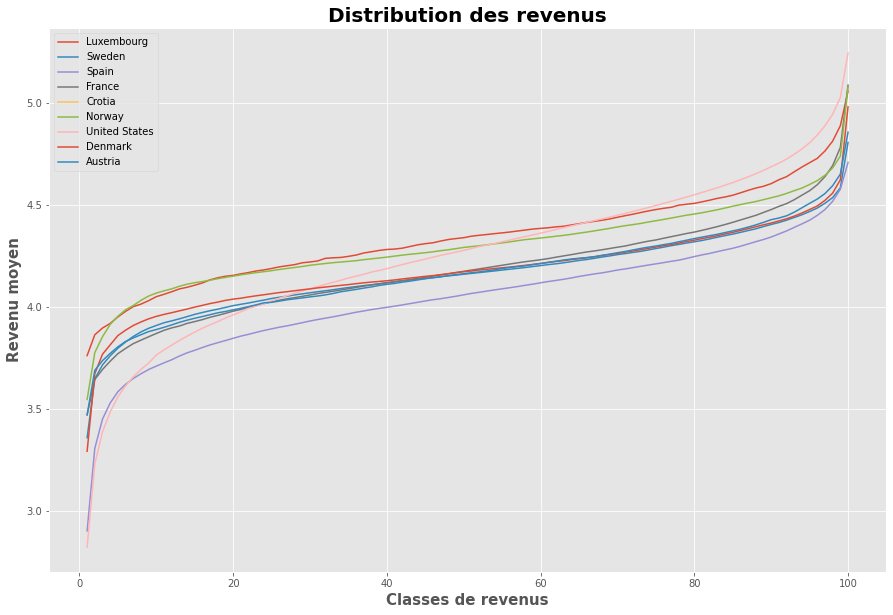

In [ ]:
#Distribution des revenus 
plt.figure(figsize=(15,10))

for x in country_list: 
    data = df[df.country == x]
    plt.plot(data['quantile'], np.log10(data['income']), label=x)

plt.title("Distribution des revenus", fontsize=20, fontweight='bold')
plt.xlabel("Classes de revenus", fontsize=15, fontweight='bold')
plt.ylabel("Revenu moyen", fontsize=15, fontweight='bold')
plt.legend()

plt.savefig('distribution_revenu_country_plot.jpg')
plt.show()

Prenons le cas des extr√™mes, **l'Espagne reste toujours le pays le plus pauvre, le Luxembourg le pays le plus riche, quelque soit la classe de revenu**. 

**Pour la France on constate qu'un √©cart se creuse entre les classes de revenu assez faible et celles plus hautes (apr√®s le centile 50) qui positionne la population juste apr√®s les classes plus riches des pays leaders √âtats-Unis, luxembourg et Norv√®ge.** Ces tendances seront √† v√©rifier plus bas avec l'√©volution des indices de Gini‚Ä¶

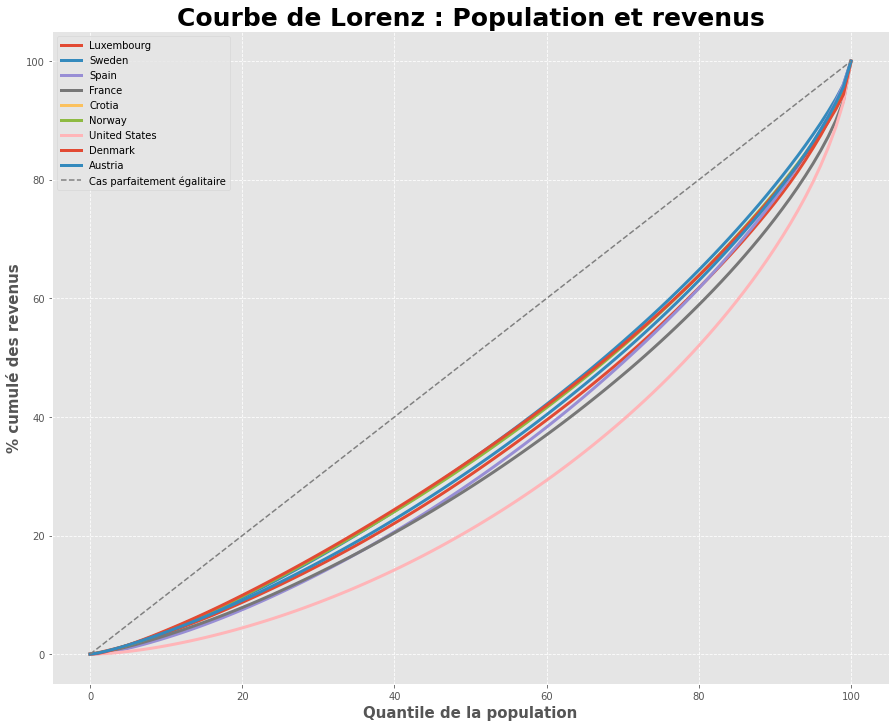

In [ ]:
#Courbe de Lorenz
plt.figure(figsize = (15, 12))
list_gini = []

for count in country_list:
    # revenus_total_pays : Revenus total sur les 100 centiles
    revenus_total_pays = df[df.country==count]['income'].sum()
    
    dep = df[df.country==count]['income'].values
    n = len(dep)
    
    # lorenz : Courbe de lorenz
    lorenz = (np.cumsum(np.sort(df[df.country==count]['income']))/revenus_total_pays)*100
    lorenz = np.append([0],lorenz) 
    x = np.append([0],df[df.country==count]['quantile'])    
    plt.plot(x,lorenz,linewidth=3, label=count)

    
plt.plot([0,100],[0,100],'grey',linestyle='--',linewidth=1.5, label='Cas parfaitement √©galitaire')
plt.xlabel('Quantile de la population',fontsize=15,fontweight = 'bold')
plt.ylabel('% cumul√© des revenus',fontsize=15,fontweight = 'bold')
plt.legend(loc='upper left',fontsize=10)
plt.grid(True,linestyle='--')
plt.title('Courbe de Lorenz : Population et revenus',fontsize=25,fontweight = 'bold')

plt.savefig('country_lorenz.jpg')
plt.show()

**La Su√®de et le Danemark pr√©sentent une distribution des revenus au sein de la population beaucoup plus √©galitaire que les autres pays. A l'oppos√©, on peut distinguer une distribution de revenus plus in√©galitaire pour les Etats-Unis et la France.**

In [ ]:
#Chargement des indices de Gini pour nos pays
#Source https://data.worldbank.org/indicator/SI.POV.GINI
gini_country = pd.read_csv('/gdrive/MyDrive/gini_worlbank.csv', skiprows=4)
gini_country.head(2)

Country Name Country Code  ... 2019 2020
0                        Aruba          ABW  ...  NaN  NaN
1  Africa Eastern and Southern          AFE  ...  NaN  NaN

[2 rows x 65 columns]

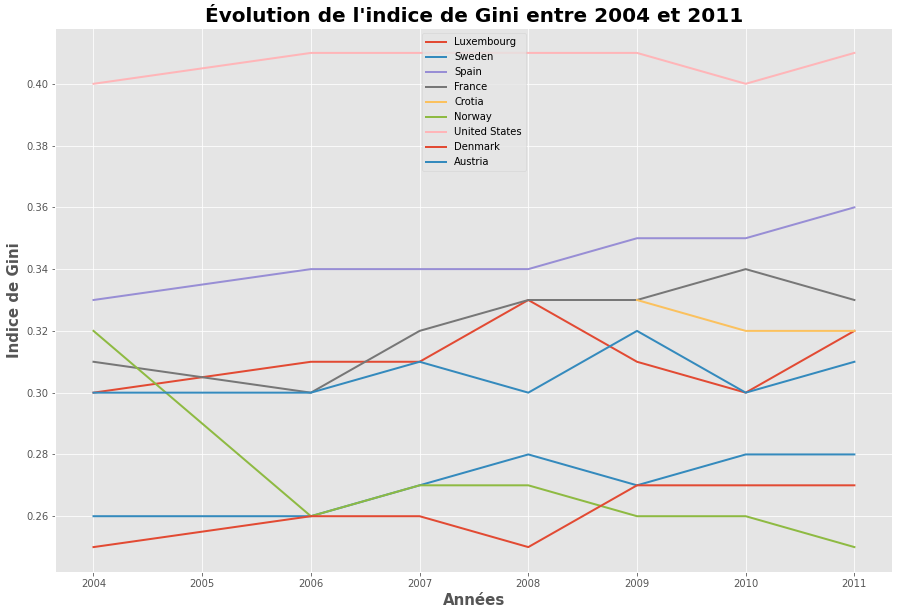

In [ ]:
#√âvolution de l'indice de Gini
plt.figure(figsize=(15,10))

for c_code, c_name in zip(country_code, country_list):   
    plt.plot(gini_melt[gini_melt['country_code']==c_code]['year'],
             gini_melt[gini_melt.country_code==c_code]['gini'],linewidth=2, label=c_name)

plt.title("√âvolution de l'indice de Gini entre 2004 et 2011", fontsize=20, fontweight='bold')
plt.xlabel("Ann√©es", fontsize=15, fontweight='bold')
plt.ylabel("Indice de Gini", fontsize=15, fontweight='bold')
plt.legend()

plt.savefig('gini_evolution.jpg')
plt.show()

Dans la plupart des pays **on constate un indice de Gini plus ou moins stable**, il n'y a pas de "r√©els changements" sur cette p√©riode. **Mais en prenant l'interpr√©tation au cas par cas, pays par pays, on peut relever quelques points de d√©gradation pour la France, l'Espagne et pour la Su√®de. Une hausse de l'indice expliquant plus d'in√©galit√© de revenu et de patrimoine sur cette courte p√©riode de 2004 √† 2011, avec 2005 non repr√©sent√©e ici.**

In [ ]:
#Utilisation de la fonction .rank() pour d√©terminer la position de chaque pays, dont la France
gini_group = pd.DataFrame(gini_melt.groupby(['country_code', 'country']).gini.mean()).reset_index()
gini_group['rang'] = gini_group['gini'].rank(ascending=True)
gini_group.head()

country_code    country      gini   rang
0          AGO     Angola  0.430000  100.5
1          ALB    Albania  0.300000   20.0
2          ARG  Argentina  0.451429  113.0
3          ARM    Armenia  0.307143   23.0
4          AUS  Australia  0.343333   52.5

In [ ]:
#5 pays ayant l'indice de Gini le plus √©lev√©
gini_group.sort_values(by='gini', ascending=False).head()

country_code                   country  gini   rang
140          ZAF              South Africa  0.63  143.0
92           NAM                   Namibia  0.61  142.0
18           BWA                  Botswana  0.60  141.0
29           COM                   Comoros  0.56  139.5
19           CAF  Central African Republic  0.56  139.5

In [ ]:
#5 pays ayant l'indice de Gini le plus faible
gini_group.sort_values(by='gini', ascending=True).head()

country_code          country      gini  rang
118          SVN         Slovenia  0.245714   1.0
35           DNK          Denmark  0.261429   2.0
117          SVK  Slovak Republic  0.262857   3.0
33           CZE   Czech Republic  0.265714   4.0
132          UKR          Ukraine  0.268571   5.0

In [ ]:
#Position de la France 
gini_group[gini_group.country == 'France']

country_code country      gini  rang
45          FRA  France  0.322857  35.5

A ce stade, **nous avons une id√©e plus pr√©cise du revenu moyen des pays, et de la r√©partition des richesses**. D'un c√¥t√© des pays riches avec de fortes in√©galit√©s ou pas, et des pays comme le notre pour qui les in√©galit√©s entre les classes ont eu tendances √† se creuser en quelques ann√©es. Voyons comment les classes de revenu des parents peuvent interagir au sein d'un pays, et aupr√®s de leurs enfants.

MISSION 3

**√âtude des classes de revenu des parents**

Dans l'√©tat actuel, nous avons √† disposition deux des trois variables explicatives souhait√©es :

le revenu moyen du pays,
l'indice de Gini du pays.

**Il manque donc, pour un individu, la classe de revenu de ses parents**.

Ici nous supposons que l'on associe √† chaque individu i une unique classe 'c_i_parent', quel que soit le nombre de parents de i.

Il est donc question de simuler cette information gr√¢ce √† un coefficient (propre √† chaque pays ) mesurant une corr√©lation entre le revenu de l'individu et le revenu de ses parents.** Ce coefficient sera ici appel√© coefficient d'√©lasticit√©** pj, il mesure la mobilit√© interg√©n√©rationnelle du revenu.

Ci-dessous un aper√ßu de nos deux sources de donn√©es

In [ ]:
#Fichier elasticity.txt
elasticity_file = pd.read_csv('/gdrive/MyDrive/elasticity.txt', sep = "\t")[:16]
elasticity_file

Coefficients of intergenerational elasticity between parents‚Äô and
0                                   children‚Äôs income               
1                             | Base case  | Optim...               
2                             |            | (high...               
3   ----------------------------------------------...               
4   Nordic European countries |    0.2     |      ...               
5   and Canada                |            |      ...               
6   ----------------------------------------------...               
7   Europe (except nordic     |    0.4     |      ...               
8   countries)                |            |      ...               
9   ----------------------------------------------...               
10  Australia/New Zealand/USA |    0.4     |      ...               
11  ----------------------------------------------...               
12  Asia                      |    0.5     |      ...               
13  ----------------------------------------------...               
14  Latin America/Africa      |    0.66    |      ...               
15  ----------------------------------------------...

In [ ]:
#Chargement et traitement des donn√©es GDIM
gdim = pd.read_csv('/gdrive/MyDrive/GDIMMay2018.csv').loc[:, ['countryname', 'iso3', 'region', 'IGEincome']]
gdim.rename(columns={'countryname': 'country', 'iso3' : 'country_code'}, inplace=True)
gdim.drop_duplicates(inplace=True)
gdim.drop_duplicates(subset=['country'], keep = 'last', inplace=True)
display(gdim.head(10))
display(gdim.shape)

country country_code                     region  IGEincome
0    Afghanistan          AFG                 South Asia        NaN
12        Angola          AGO         Sub-Saharan Africa        NaN
60       Albania          ALB      Europe & Central Asia   0.815874
84     Argentina          ARG  Latin America & Caribbean        NaN
99       Armenia          ARM      Europe & Central Asia        NaN
183    Australia          AUS                High income   0.275000
243      Austria          AUT                High income   0.245267
279   Azerbaijan          AZE      Europe & Central Asia        NaN
351      Belgium          BEL                High income   0.183176
405        Benin          BEN         Sub-Saharan Africa   0.855116

(150, 4)

In [ ]:
#Isolement des pays sans valeur pour la variable 'IGEincome'
missing_gdim = gdim[gdim['IGEincome'].isna()]
display(missing_gdim.tail())
display(len(missing_gdim))

country country_code                      region  IGEincome
6298       Venezuela, RB          VEN   Latin America & Caribbean        NaN
6366             Vanuatu          VUT         East Asia & Pacific        NaN
6378  West Bank and Gaza          PSE  Middle East & North Africa        NaN
6390         Yemen, Rep.          YEM  Middle East & North Africa        NaN
6492              Zambia          ZMB          Sub-Saharan Africa        NaN

77

In [ ]:
#Identification des pays sans valeur pour la variable 'IGEincome'
missing_countries_gdim = missing_gdim['country_code'].unique()
missing_countries_gdim = list(missing_countries_gdim)
len(missing_countries_gdim)

77

In [ ]:
#Visualisation des r√©gions concern√©es 
list(missing_gdim.region.unique())

['South Asia',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'High income',
 'East Asia & Pacific']

In [ ]:
#Visualisation des pays concern√©s par la r√©gion 'High income'
missing_gdim[missing_gdim['region'] == 'High income']['country'].unique()

array(['Estonia', 'Hungary', 'Iceland', 'Israel', 'Lithuania', 'Poland',
       'Uruguay'], dtype=object)

In [ ]:
#Boucle it√©rative afin d'imputer les valeurs NaN sur la variable 'IGEincome'
for code in missing_countries_gdim :
    if list(gdim.loc[gdim['country_code'] == code, 'region']) == ['South Asia']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.50
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['Sub-Saharan Africa']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.66
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['Latin America & Caribbean']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.66
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['Europe & Central Asia']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.40                                                               
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['East Asia & Pacific']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.50
    else : gdim.loc[gdim['country_code'] == code, 'IGEincome'] =  0.40                                     

In [ ]:
#Jointure avec notre dataframe 'df' et celui obtenu 'gdim'
#'IGEincome' sera renomm√© en 'pj'
df_income_mobility = pd.merge(df, gdim[['country_code', 'IGEincome']], how='left', on='country_code')
df_income_mobility.rename(columns={'IGEincome': 'pj'}, inplace=True)
df_income_mobility.head()

country_code  country  year  ...  gini   income_avg        pj
0          ALB  Albania  2008  ...   0.3  2994.829902  0.815874
1          ALB  Albania  2008  ...   0.3  2994.829902  0.815874
2          ALB  Albania  2008  ...   0.3  2994.829902  0.815874
3          ALB  Albania  2008  ...   0.3  2994.829902  0.815874
4          ALB  Albania  2008  ...   0.3  2994.829902  0.815874

[5 rows x 11 columns]

In [ ]:
#V√©rification des √©ventuelles valeurs manquantes
last_list_missing_countries = list(df_income_mobility[df_income_mobility['pj'].isna()]['country'].unique())
last_list_missing_countries

['Kosovo', 'Syrian Arab Republic']

La Syrie est un pays d'Asie de l'Ouest > pj = 0.50*
*Le Kosovo est un pays d'Europe du Sud > pj = 0.40

In [ ]:
#Imputation des 2 derni√®res valeurs NaN dans le dataframe 
for country in last_list_missing_countries :
    if list(df_income_mobility[df_income_mobility['country'] == "Kosovo"]):
        df_income_mobility.loc[df_income_mobility['country'] == country, 'pj'] = 0.40
    else : 
        df_income_mobility.loc[df_income_mobility['country'] == country, 'pj'] = 0.50

In [ ]:
#Derni√®re validation de la compl√©tude du dataframe "df_income_mobility"
df_income_mobility.isna().any()

country_code    False
country         False
year            False
quantile        False
nb_quantiles    False
income          False
gdpppp          False
population      False
gini            False
income_avg      False
pj              False
dtype: bool

Les bool√©ens sont tous en False, visualisons le jeu de donn√©es.

In [ ]:
#Visualisation des premi√®res lignes de l'√©chantillon 
display(df_income_mobility.head())
display(df_income_mobility.shape)

country_code  country  year  ...  gini   income_avg        pj
0          ALB  Albania  2008  ...   0.3  2994.829902  0.815874
1          ALB  Albania  2008  ...   0.3  2994.829902  0.815874
2          ALB  Albania  2008  ...   0.3  2994.829902  0.815874
3          ALB  Albania  2008  ...   0.3  2994.829902  0.815874
4          ALB  Albania  2008  ...   0.3  2994.829902  0.815874

[5 rows x 11 columns]

(11600, 11)

L'√©chantillon contient 11600 individus, **notre √©chantillon de travail a d√©sormais son coefficient d'√©lasticit√© qui mesure la mobilit√© interg√©n√©rationnelle du revenu. A partir des 3 variables explicatives le revenu moyen du pays, l'indice de Gini du pays et le coefficient d'√©lasticit√©**, 

nous pourrons g√©n√©rer des classes de revenu des parents.

**Revenus des parents selon une loi normale (de moyenne 0 et d'√©cart-type 1)**

Les revenus des parents (exprim√©s en logs) sont g√©n√©r√©s de fa√ßon al√©atoires selon une loi normale. La moyenne et variance n'ont aucune incidence sur le r√©sultat final. n doit-√™tre sup√©rieur √† 1000 fois le nombre de quantiles.

In [ ]:
pj = 0.33                #Coefficient d'√©lasticit√© d'un pays j (ici la France sera prise pour exemple)
nb_quantiles = 100       #Nombre de quantiles (nombre de classes de revenu)
n = 1000*nb_quantiles    #Taille de l'√©chantillon

In [ ]:
#Utilisation de scipy pour g√©n√©rer al√©atoirement la variable 'ln(Yparent)'
ln_y_parent = st.norm(0,1).rvs(size=n)


**Terme d'erreur œµ selon une loi normale (de moyenne 0 et d'√©cart-type G√©n√©ration al√©atoire d'une r√©alisation du terme d'erreur epsilon.**

In [ ]:
#Utilisation de scipy pour g√©n√©rer al√©atoirement epsilon
residues = st.norm(0,1).rvs(size=n)

**Revenus des enfants ychild**

Les valeurs des revenus enfants ychild sont calcul√©es pour une valeur donn√©e de pj (ici 0.33). A ce stade, ychild contient des valeurs dont l'ordre de grandeur ne refl√®te pas la r√©alit√©, mais cela n'a pas d'influence pour la suite.

In [ ]:
#G√©n√©ration des revenus des parents et des enfants selon les √©l√©ments cit√©s ci-dessus
#Application de la fonction generate_incomes()
def generate_incomes(n, pj):
    ln_y_parent = st.norm(0,1).rvs(size=n)
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

y_child, y_parents = generate_incomes(n, pj)

**Calcul des classes de revenu des enfants et des parents selon les n individus g√©n√©r√©s pr√©c√©demment¬∂**


Pour chacun des n individus g√©n√©r√©s, les classes de revenu sont calcul√©es selon ychild et yparent.

In [ ]:
#Cr√©ation d'un √©chantillon nomm√© "sample" via deux fonctions r√©pondant aux crit√®res li√©s aux quantiles
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

sample = compute_quantiles(y_child, y_parents, nb_quantiles)

In [ ]:
#Visualisation des 5 premi√®res classes de revenu enfants et parents
display(sample.head())
display(sample.shape)

y_child  y_parents  c_i_child  c_i_parent
0  0.505204   0.743985         26          39
1  2.935594   0.357383         85          16
2  0.632168   1.155897         34          56
3  0.802596   3.898965         42          92
4  7.636845   1.674035         98          70

(100000, 4)

**Estimation de la distribution conditionnelle des classes de revenus parents pour chaque classe enfant¬∂**

Les calculs sont toujours d√©pendants du coefficient d'√©lasticit√© pj du pays, dans notre cas d'exemple nous sommes toujours en pj = 0.33 pour la France.

In [ ]:
#utilisation des fonctions de distribution et de probabilit√© conditionnelles
def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]


cd = conditional_distributions(sample, nb_quantiles)


In [ ]:
#It√©ration selon nos classes de revenu
nb_quantiles = 101
cd = conditional_distributions(sample, nb_quantiles)

class myInformativeException(Exception):
    def __init__(self, count):
        self.count = count
proba = []
try:        
    for x, y in zip(sample['c_i_child'], sample['c_i_parent']):
        p = proba_cond(y, x, cd)
        proba.append(p)
except myInformativeException as e:
    print("Error on ", e.count)

sample['proba'] = proba
sample.head()

y_child  y_parents  c_i_child  c_i_parent  proba
0  0.505204   0.743985         26          39  0.011
1  2.935594   0.357383         85          16  0.008
2  0.632168   1.155897         34          56  0.010
3  0.802596   3.898965         42          92  0.010
4  7.636845   1.674035         98          70  0.009

Graphiquement nous pourrons mieux comprendre la corr√©lation entre le revenu de l'individu et le revenu de ses parents.

**Visualisation des distributions conditionnelles**

A des fins de v√©rification, nous pouvons cr√©er un graphique repr√©sentant ces distributions conditionnelles. Voici 2 exemples pour une population segment√©e en 10 classes, pour 2 valeurs de pj: l'une traduisant une forte mobilit√© (0.1) et l'autre une tr√®s faible mobilit√© (0.9).

In [ ]:
#Fonction permettant de visualiser le comportement des distributions conditionnelles 
def plot_conditional_distributions_high(p, cd, nb_quantiles):
    plt.figure(figsize = (10, 6))
    
    # La ligne suivante sert √† afficher un graphique en "stack bars", sur ce mod√®le : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("Forte mobilit√© " + "p=" + str(p), fontsize=15, fontweight='bold')
    plt.legend()
    plt.xlabel("quantile parents", fontsize=10, fontweight='bold')
    plt.ylabel("probabilit√© du quantile enfant", fontsize=10, fontweight='bold')
    
    plt.savefig('distri_cond_forte_mobilite.jpg')
    plt.show()


**Voici 2 exemples pour une population segment√©e en 10 classes, pour 2 valeurs de pj :**

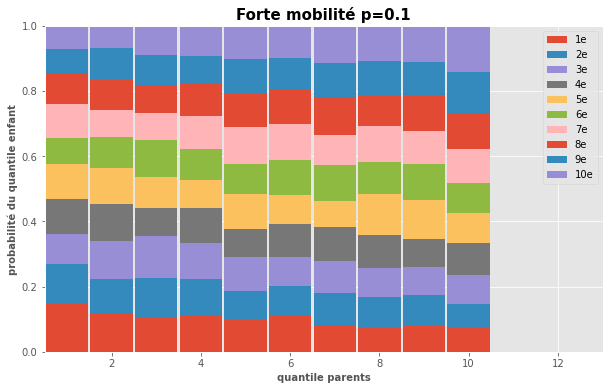

In [ ]:
#Exemple d'une forte mobilit√© avec un pj = 0.1
pj_strong = 0.1                
nb_quantiles_strong = 10       
n_strong  = 1000*nb_quantiles_strong   

y_child_strong, y_parents_strong = generate_incomes(n_strong, pj_strong)
sample_strong = compute_quantiles(y_child_strong, y_parents_strong, nb_quantiles_strong)
cd_strong = conditional_distributions(sample_strong, nb_quantiles_strong)
plot_conditional_distributions_high(pj_strong, cd_strong, nb_quantiles_strong)

In [ ]:
#Fonction permettant de visualiser le comportement des distributions conditionnelles 
def plot_conditional_distributions_low(p, cd, nb_quantiles):
    plt.figure(figsize = (10, 6))
    
    # La ligne suivante sert √† afficher un graphique en "stack bars", sur ce mod√®le : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("Faible mobilit√© " + "p=" + str(p), fontsize=15, fontweight='bold')
    plt.legend()
    plt.xlabel("quantile parents", fontsize=10, fontweight='bold')
    plt.ylabel("probabilit√© du quantile enfant", fontsize=10, fontweight='bold')
    
    plt.savefig('distri_cond_faible_mobilite.jpg')
    plt.show()


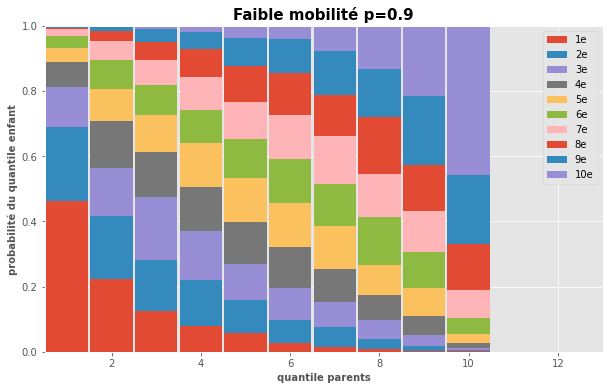

In [ ]:
#Exemple d'une tr√®s faible mobilit√© avec un pj = 0.9
pj_low = 0.9                
nb_quantiles_low = 10       
n_low  = 1000*nb_quantiles_low   

y_child_low, y_parents_low = generate_incomes(n_low, pj_low)
sample_low = compute_quantiles(y_child_low, y_parents_low, nb_quantiles_low)
cd_low = conditional_distributions(sample_low, nb_quantiles_low)
plot_conditional_distributions_low(pj_low, cd_low, nb_quantiles_low)

**Les deux exemples d√©montrent clairement des situations extr√™mes r√©v√©latrices de la mobilit√© des classes de revenu enfants / parents**. 

Dans une situation √† faible mobilit√© interg√©n√©rationnelle, prenons l'exemple de la 10√®me classe parents pour laquelle il y a moins de 50% de mobilit√© chez les enfants, en d'autres termes les enfants resteront majoritairement dans la classe de revenu de leurs parents.

**Suppression des individus**

Pour √©viter toute confusion, les individus g√©n√©r√©s sont supprim√©s (car inutiles pour la suite), seules les distributions conditionnelles sont conserv√©es.

In [ ]:
sample = sample.iloc[:, 2:]
sample.head()

c_i_child  c_i_parent  proba
0         26          39  0.011
1         85          16  0.008
2         34          56  0.010
3         42          92  0.010
4         98          70  0.009

**Nouvel √©chantillon : 500 fois plus grand que celui de la World Income Distribution**

Celui-ci sera cr√©√© √† partir de la WID. Pour chaque individu de la World Income Distribution, il y aura 499 "clones". **La taille du nouvel √©chantillon sera donc 500 fois plus grand que celui de la World Income Distribution.**

In [ ]:
#Cet √©chantillon sera nomm√© "df_wid500", clone repr√©sentatif des individus de la WID
df_wid500 = df_income_mobility[['country_code', 'country', 'quantile', 'population', 
                                'income', 'income_avg', 'gini', 'pj']]

df_wid500 = pd.concat([df_wid500]*500, ignore_index=True)
display(df_wid500.head())
display(df_wid500.shape)

country_code  country  quantile  ...   income_avg  gini        pj
0          ALB  Albania         1  ...  2994.829902   0.3  0.815874
1          ALB  Albania         2  ...  2994.829902   0.3  0.815874
2          ALB  Albania         3  ...  2994.829902   0.3  0.815874
3          ALB  Albania         4  ...  2994.829902   0.3  0.815874
4          ALB  Albania         5  ...  2994.829902   0.3  0.815874

[5 rows x 8 columns]

(5800000, 8)

Attribution des classes parents aux 500 individus de chaque pays
Pour chaque  ùëêùëñ,ùëê‚Ñéùëñùëôùëë  et chaque pays, il y a donc 500 individus. 

 Maintenant il est question d'attribuer aux 500 individus leurs classes  ùëêùëñ,ùëùùëéùëüùëíùëõùë°  conform√©ment aux distributions trouv√©es pr√©c√©demment. Par exemple, si P( ùëêùëñ,ùëùùëéùëüùëíùëõùë° =8| ùëêùëñ,ùëê‚Ñéùëñùëôùëë =5, ùëùùëó =0.9) = 0.03 , alors la classe  ùëêùëñ,ùëùùëéùëüùëíùëõùë°  sera 8 √† 15 des 500 individus du pays j ayant  ùëêùëñ,ùëê‚Ñéùëñùëôùëë =5 , car 500*0.03 = 15.

In [ ]:
#Coefficient d'√©lasticit√© / code pays
country_income = df_income_mobility[['country_code', 'pj']]
country_income

country_code        pj
0              ALB  0.815874
1              ALB  0.815874
2              ALB  0.815874
3              ALB  0.815874
4              ALB  0.815874
...            ...       ...
11595          COD  0.707703
11596          COD  0.707703
11597          COD  0.707703
11598          COD  0.707703
11599          LTU  0.400000

[11600 rows x 2 columns]

In [ ]:
nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n = len(df_wid500) # taille de l'√©chantillon
ln_y_parent = st.norm(0,1).rvs(size=n)
residus = st.norm(0,1).rvs(size=n)


In [ ]:
df_wid500 = pd.concat([
   pd.DataFrame(list(zip(ln_y_parent, residus)), columns=['ln_y_parent','residus']),
   df_wid500], axis=1)
df_wid500


ln_y_parent   residus country_code  ...   income_avg  gini        pj
0           0.433980 -1.778073          ALB  ...  2994.829902  0.30  0.815874
1          -0.936572  0.358816          ALB  ...  2994.829902  0.30  0.815874
2           0.594741  0.148855          ALB  ...  2994.829902  0.30  0.815874
3          -0.770170  0.312035          ALB  ...  2994.829902  0.30  0.815874
4           0.024164  1.833999          ALB  ...  2994.829902  0.30  0.815874
...              ...       ...          ...  ...          ...   ...       ...
5799995     0.933510 -0.669294          COD  ...   276.016044  0.44  0.707703
5799996     0.439503  0.902460          COD  ...   276.016044  0.44  0.707703
5799997     1.661457 -1.495121          COD  ...   276.016044  0.44  0.707703
5799998    -0.580475 -0.013190          COD  ...   276.016044  0.44  0.707703
5799999    -1.611852  0.301272          LTU  ...  6623.656565  0.36  0.400000

[5800000 rows x 10 columns]

**Mod√©lisation : √©tude de l'ANOVA**

Ici il sera question d'expliquer le revenu des individus en fonction de plusieurs variables explicatives : **le pays de l'individu, l'indice de Gini de ce pays, la classe de revenu des parents**, etc. L'analyse de la Variance permettra d'expliquer l'influence de notre variable explicative, le pays de l'individu. Puis pour finir la performance du mod√®le sera √©tudi√©e

In [ ]:
from scipy.stats import t, shapiro
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t, shapiro

In [ ]:
#Rappel de l'√©chantillon final pr√©c√©demment obtenu
display(df_wid500.head())
display(df_wid500.shape)

ln_y_parent   residus country_code  ...   income_avg  gini        pj
0     0.433980 -1.778073          ALB  ...  2994.829902   0.3  0.815874
1    -0.936572  0.358816          ALB  ...  2994.829902   0.3  0.815874
2     0.594741  0.148855          ALB  ...  2994.829902   0.3  0.815874
3    -0.770170  0.312035          ALB  ...  2994.829902   0.3  0.815874
4     0.024164  1.833999          ALB  ...  2994.829902   0.3  0.815874

[5 rows x 10 columns]

(5800000, 10)

**ANOVA √† un facteur variable explicative le pays de l‚Äôindividu**

R√©alisation de l'ANOVA en consid√©rant ** comme variable explicative que le pays de l‚Äôindividu, puis analyse de la performance du mod√®le.**
Utilisation de statsmodels

**On dispose de plusieurs variables quantitatives et d'une seule qualitative : le pays (on exclue la r√©gion)**. 

**On testera au pr√©alable si le pays a un impact sur le revenu d'un individu, avec une ANOVA.**

L'ANOVA compare les moyennes entre plus de 2 groupes (ici, les pays). On cherchera √† rejeter l'hypoth√®se 0, selon laquelle les moyennes (ici, de revenus enfants) ne varient pas entre pays.

Si les moyennes de revenu diff√®rent entre les groupes, on pourra dire que le pays est corr√©l√© au revenu des enfants

**Premi√®re approche par repr√©sentation visuelle Boxplot selon les 9 pays identifi√©s lors du clustering**

Il est int√©ressant d'avoir un premier aper√ßu **pouvant montrer l'influence d'un pays sur le revenu moyen des individus.**

In [ ]:
#Rappel des pays identifi√©s lors du clustering et restriction sur notre √©chantillon "df_wid500"
country_list =['Luxembourg', 'Sweden', 'Spain', 'France', 'Crotia', 'Norway', 'United States', 'Denmark', 'Austria']
df_wid500_country_list = df_wid500[df_wid500['country'].isin(country_list)]

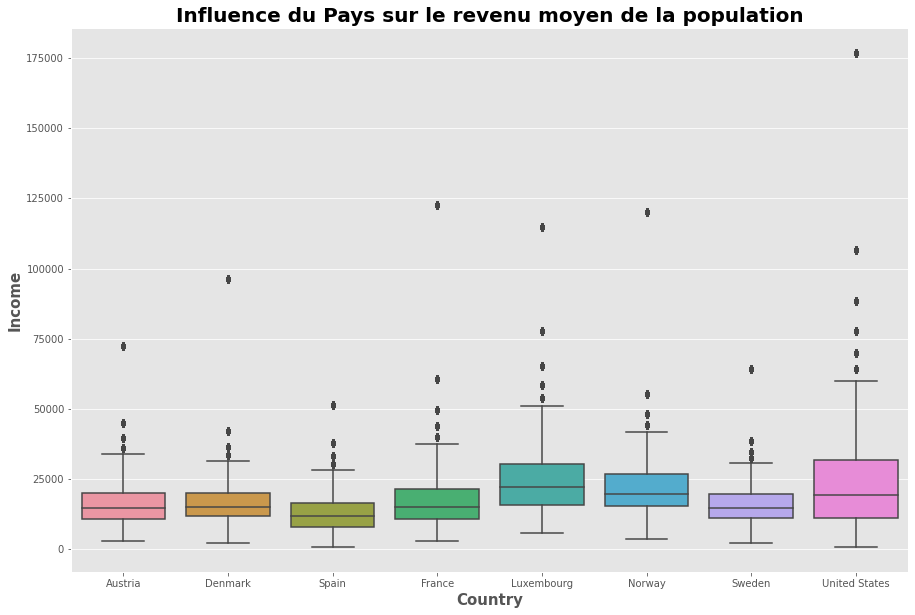

In [ ]:
#Repr√©sentation des distributions par boxplot 
plt.figure(figsize=(15, 10))

ax = sns.boxplot(x="country", y="income", data=df_wid500_country_list)
plt.title('Influence du Pays sur le revenu moyen de la population', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=15, fontweight='bold')
plt.ylabel('Income', fontsize=15, fontweight='bold')

plt.savefig('distribution_income_country_selection.jpg')
plt.show()

Les pays semblent assez diff√©rentes, l'ordre de grandeur de ces √©carts n'est pas tr√®s grand. **La question sera de savoir si ces √©carts sont significatifs ou pas. C'est l'ANOVA qui nous permettra de r√©pondre √† cette question.**

In [ ]:
#Anova pour tester l'influence du pays de l‚Äôindividu sur le revenu moyen des individus 
anova_income = smf.ols('income ~ country_code', data=df_wid500).fit()
print(anova_income.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 4.971e+04
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:26:18   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799884   BIC:                         1.186e+08
Df Model:                         115                                         
Covariance Type:            nonrobust                                         


**R¬≤ = 0.496, on peut en conclure que la variable explicative Pays explique pr√®s de 50%** de la variance du revenu de l'individu. Le reste, donc la moiti√© de la variance sur le revenu est expliqu√©e par les autres facteurs non consid√©r√©s dans ce mod√®le.

**Test de Fisher**

In [ ]:
#Affichage des resultats du test de Fisher (influence de la variable pays)
import statsmodels.api as sm
sm.stats.anova_lm(anova_income, typ=2)

sum_sq         df            F  PR(>F)
country_code  2.551188e+14      115.0  49710.75889     0.0
Residual      2.588293e+14  5799884.0          NaN     NaN

**La p-valeur de ce test (~0.0)** est tr√®s petite et largement inf√©rieure √† 5%. On rejette donc l'hypoth√®se H0 selon laquelle . Le pays a donc bien une influence sur le revenu moyen des individus, comme nous en avions l'intuition en regardant les boxplot‚Ä¶

Comparaison de l'ANOVA avec le logarithme du revenu de l'individu :

Le mod√®le sera t-il plus performant? Le but ici est de pouvoir d√©terminer l'impact du logarithme sur l'ANOVA 

In [ ]:
#Calcul et int√©gration de la variable logarithmique 'ln_income'
df_wid500['ln_income'] = np.log(df_wid500['income'])

In [ ]:
#Nouvelle Anova pour tester l'influence du pays de l‚Äôindividu sur le logarithme du revenu moyen des individus 
anova_ln_income = smf.ols('ln_income ~ country_code', data=df_wid500).fit()
print(anova_ln_income.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.358e+05
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:27:56   Log-Likelihood:            -6.3135e+06
No. Observations:             5800000   AIC:                         1.263e+07
Df Residuals:                 5799884   BIC:                         1.263e+07
Df Model:                         115                                         
Covariance Type:            nonrobust                                         


**En consid√©rant le logarithme du revenu, la variance expliqu√©e est plus concluante, 73% contre 50% pr√©c√©demment.**

**Regression Lin√©aire**

**R√©gression lin√©aire sur nos donn√©es, en incluant comme variables explicatives uniquement le revenu moyen du pays de l‚Äôindividu et l‚Äôindice de Gini du pays de l‚Äôindividu.** Quel est le pourcentage de variance expliqu√©e par le(s) mod√®le(s) ?

**Premi√®re R√©gression Lin√©aire : Revenu moyen du pays de l‚Äôindividu et l‚Äôindice de Gini du pays de l‚Äôindividu**

In [ ]:
#Cr√©ation du premier mod√®le de R√©gression lin√©aire
modele1 = smf.ols('income ~ gini + income_avg', data=df_wid500).fit()
print(modele1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.858e+06
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:27:59   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799997   BIC:                         1.186e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.48e-12     14.971   1.66e-13      1.0

la variance des r√©sidus est beaucoup moins √©l√©v√©e qu'avec le mod√®le pr√©c√©dent
la variable gini n'est plus significative (p-value de 1)
income_mean explique √† elle seule le mod√®le (p-value de 0)
la colin√©arit√© est beaucoup plus forte que pr√©c√©demment (le mod√®le renvoie d'ailleurs un avertissement cette fois-ci)
le coefficient de la seule variable significative (income_mean) passe √† 1 : pas besoin de multiplier sa valeur vu qu'elle est la seule avec l'intercept dans la formule de r√©gression.

**Ce mod√®le n'explique que 50% de la variance, nous ne sommes pas plus performant que l'ANOVA.**

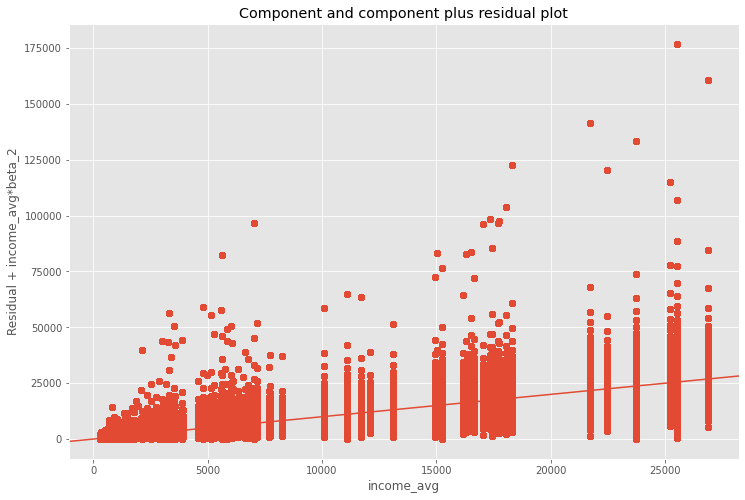

In [ ]:
#Approche visuelle rapide de notre r√©gression lin√©aire
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele1, "income_avg", ax=ax)

**Comparer la performance du premier mod√®le avec un second mod√®le incluant le logarithme du revenu moyen du pays.**

**Seconde R√©gression Lin√©aire : Logarithme du Revenu moyen du pays de l‚Äôindividu et l‚Äôindice de Gini du pays de l‚Äôindividu**

In [ ]:
#Calcul et int√©gration de la variable logarithmique 'ln_income_avg'
df_wid500['ln_income_avg'] = np.log(df_wid500['income_avg'])

In [ ]:
#Cr√©ation d'un second mod√®le de R√©gression lin√©aire √† des fins de comparaison selon le logarithme 
modele2 = smf.ols('ln_income ~ gini + ln_income_avg', data=df_wid500).fit()
print(modele2.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 7.773e+06
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:28:22   Log-Likelihood:            -6.3237e+06
No. Observations:             5800000   AIC:                         1.265e+07
Df Residuals:                 5799997   BIC:                         1.265e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4732      0.003    162.862

Ici, avec les variables au logarithme on constate que :

le mod√®le explique 72% de la variance
les 2 variables contribuent toutes deux au mod√®le, avec un P>|t| √† 0
le coefficient de significativit√© du revenu moyen est positif, tandis que celui du Gini est n√©gatif. Plus l'indice de Gini sera haut (signe d'in√©galit√©), plus le revenu pr√©dit sera faible.

Table d'analyse des variances avec statsmodels

In [ ]:
anova_table_gini_ln = sm.stats.anova_lm(modele2, typ=2)
anova_table_gini_ln["eta_sq"] = anova_table_gini_ln[:-1]['sum_sq']/sum(anova_table_gini_ln['sum_sq'])
anova_table_gini_ln

sum_sq         df             F  PR(>F)    eta_sq
gini           1.094000e+05        1.0  2.110927e+05     0.0  0.010790
ln_income_avg  7.023332e+06        1.0  1.355187e+07     0.0  0.692731
Residual       3.005882e+06  5799997.0           NaN     NaN       NaN

In [ ]:
#Autre m√©thode de calcul de la variance expliqu√©e du mod√®le
var_exp_model = round((modele2.ess / modele2.centered_tss)*100,2)
var_exp_model

72.83

**D√©composition de la variance**

In [ ]:
var_exp_pays = round(sum(anova_table_gini_ln[0:3]["eta_sq"])*100,2)
print("Le pourcentage de la variance expliqu√©e par le pays de naissance est donc de :",var_exp_pays,"%")

Le pourcentage de la variance expliqu√©e par le pays de naissance est donc de : 70.35 %


In [ ]:
var_exp_autres = round(var_exp_model - var_exp_pays,2)
print("Le pourcentage de la variance expliqu√©e par les autres facteurs non consid√©r√©s est donc de :",var_exp_autres,"%")

Le pourcentage de la variance expliqu√©e par les autres facteurs non consid√©r√©s est donc de : 2.48 %


In [ ]:
#Variance totale SCT
modele2.centered_tss

11062516.88613736

In [ ]:
#Variance expliqu√©e SCE
modele2.ess

8056635.2064939495

In [ ]:
#Variance r√©siduelle SCR
modele2.ssr

3005881.679643411

**Comme lors de l'√©tude de l'ANOVA, la version logarithmique est plus perfomante. Il ressort que le mod√®le 2, en prenant donc le logarithme du revenu et le logarithme du revenu moyen, la performance est plus optimale. Les p-valeurs sont d'ailleurs tr√®s faibles.**

**Nous retrouvons le m√™me niveau de performance que dans l'ANOVA du logarithme du revenu. Le mod√®le 2 peut expliquer 73% de la variance, le restant peut s'expliquer sur d'autres crit√®res non pris en compte jusqu'ici, √† savoir les classes de revenu des parents, ou encore des crit√®res sociaux professionels, etc‚Ä¶**

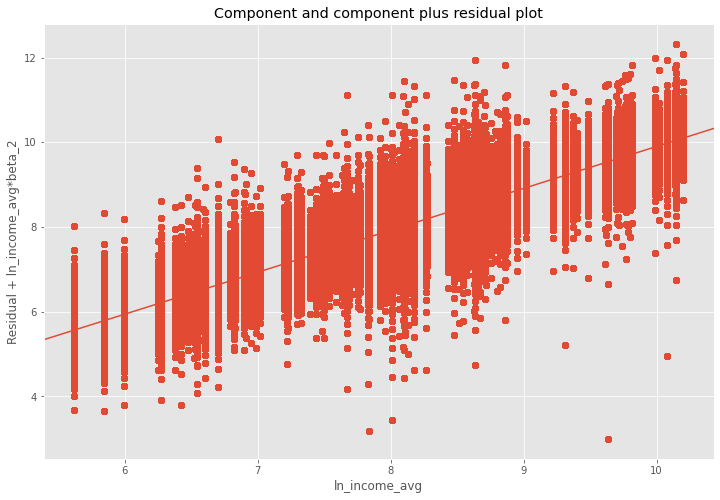

In [ ]:
#Approche visuelle rapide de notre r√©gression lin√©aire (cette fois-ci bien plus optimale)
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele2, "ln_income_avg", ax=ax)

**La seconde approche visuelle de la r√©gression lin√©aire est √©galement plus repr√©sentatrice.**

**Comparaison des r√©gressions lin√©aires en utilisant Scikit-Learn :**

In [ ]:
#Premier mod√®le (sans logarithme)
from sklearn import linear_model
X = df_wid500[['income_avg', 'gini']]
y = df_wid500['income']

model1 = linear_model.LinearRegression().fit(X, y)
model1.score(X, y)

0.4963901423109962

In [ ]:
#Second mod√®le (avec logarithme)
from sklearn import linear_model
X = df_wid500[['ln_income_avg', 'gini']]
y = df_wid500['ln_income']

model2 = linear_model.LinearRegression().fit(X, y)
model2.score(X, y)

0.7282822968243203

Cette comparaison rapide permet de conforter les pr√©c√©dents r√©sultats, **les mod√®les sont plus performants avec logarithme, ainsi la variance expliqu√©e permet de comprendre pr√®s de 73% le revenu des individus.**


**Diagnostic de la r√©gression lin√©aire des deux mod√®les (sans et avec logarithme)**

**Normalit√© des r√©sidus **




**L‚Äôinf√©rence dans la r√©gression lin√©aire multiple repose sur l‚Äôhypoth√®se de normalit√© des erreurs. Une premi√®re v√©rification importante consiste √† v√©rifier la compatibilit√© des r√©sidus (l‚Äôerreur observ√©e sur l‚Äô√©chantillon).**

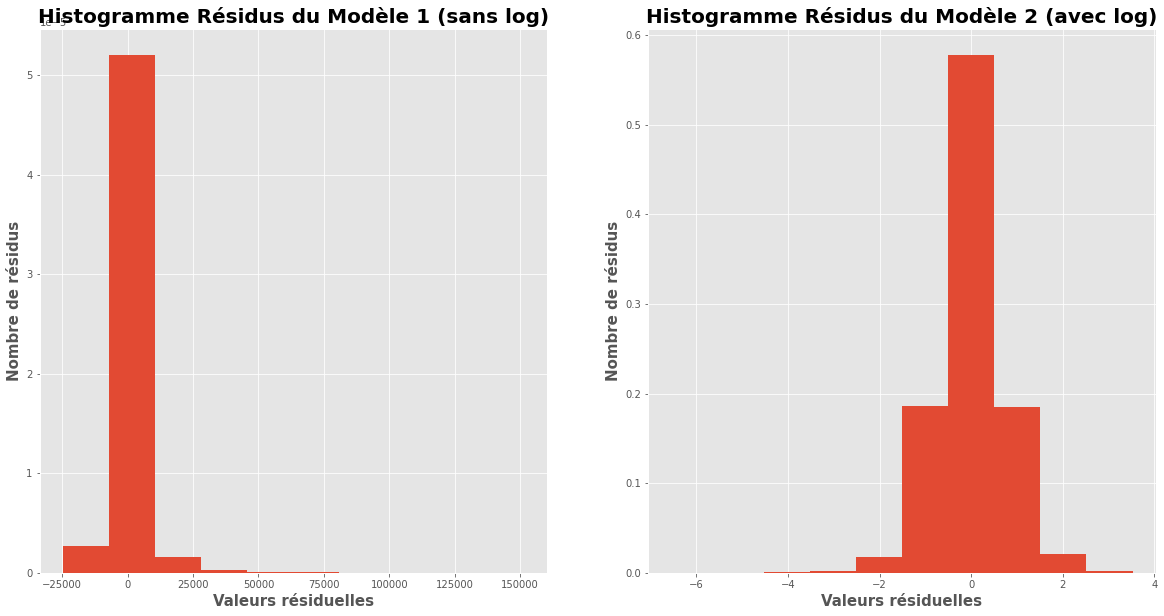

In [ ]:
#Visualisation de la normalit√© des r√©sidus : 
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist(modele1.resid, density=True)
plt.xlabel('Valeurs r√©siduelles', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de r√©sidus', fontsize=15, fontweight='bold')
plt.title('Histogramme R√©sidus du Mod√®le 1 (sans log)', fontsize=20, fontweight='bold')

plt.subplot(122)
plt.hist(modele2.resid, density=True)
plt.xlabel('Valeurs r√©siduelles', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de r√©sidus', fontsize=15, fontweight='bold')
plt.title('Histogramme R√©sidus du Mod√®le 2 (avec log)', fontsize=20, fontweight='bold')

plt.savefig('residus_distribution_model1_model2.jpg')
plt.show()

**Le mod√®le 1 (sans logarithme) renvoie une distribution des r√©sidus qui semble suivre plus difficilement une loi normale, tandis que le second mod√®le propose une distribution plus gaussienne, plus homog√®ne.**

**Autre visualisation de la distribution des r√©sidus :**

**Le graphique qqplot permet de v√©rifier la compatibilit√© de deux distributions. Dans notre cas, nous confrontons la distribution empirique des r√©sidus avec la distribution th√©orique de la loi normale. **

**On parle aussi de Droite de Henry. L‚Äôhypoth√®se nulle (normalit√©) est rejet√©e si la s√©rie de points s‚Äô√©carte manifestement de la diagonale.**

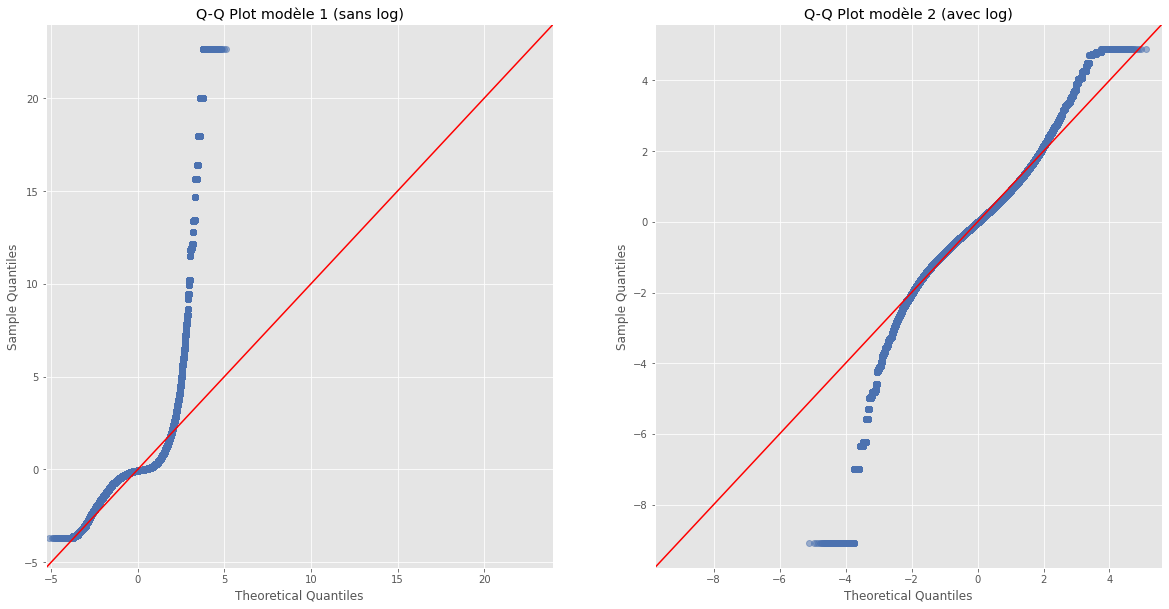

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

model_norm_residuals1 = modele1.get_influence().resid_studentized_internal
model_norm_residuals2 = modele2.get_influence().resid_studentized_internal

QQ1 = ProbPlot(model_norm_residuals1)
QQ2 = ProbPlot(model_norm_residuals2)

QQ1.qqplot(line='45', alpha=0.5, color='#4C72B0', ax=ax[0])
QQ2.qqplot(line='45', alpha=0.5, color='#4C72B0', ax=ax[1])
ax[0].set_title('Q-Q Plot mod√®le 1 (sans log)')
ax[1].set_title('Q-Q Plot mod√®le 2 (avec log)')
                
plt.savefig('qqplot_model1_model2.jpg')
plt.show()


**Le Q-Q plot vient confirmer que le mod√®le 2 issu des logarithmes propose une distribution des r√©sidus plus align√©e avec la distribution th√©orique d'une loi normale.**

**Test d'ad√©quation √† une loi normale : la statistique de Kolmogorov-Smirnov**


On peut se douter que la distribution de nos r√©sidus n'est pas "parfaite".

 V√©rifions-le par les chiffres. 
 
 L'√©chantillon √©tant de forte volum√©trie, le test se fera selon Kolmogorov-Smirnov et non Shapiro-Wilk.

In [ ]:
from scipy.stats import ks_2samp

In [ ]:
#Mod√®le 1 non logarithmique
X_ln2 = modele1.resid
Xbar_ln2 = np.mean(X_ln2)
Xsprime_ln2 = np.std(X_ln2)

ks_2samp(modele1.resid, list(np.random.normal(Xbar_ln2, Xsprime_ln2, 5_800_000)))

Ks_2sampResult(statistic=0.24622741379310342, pvalue=0.0)

In [ ]:
#Mod√®le 2 logarithmique
X_ln2 = modele2.resid
Xbar_ln2 = np.mean(X_ln2)
Xsprime_ln2 = np.std(X_ln2)

ks_2samp(modele2.resid, list(np.random.normal(Xbar_ln2, Xsprime_ln2, 5_800_000)))

Ks_2sampResult(statistic=0.034997241379310345, pvalue=0.0)

**Ici, l'hypoth√®se de normalit√© est remise en cause (p-value = 0.0 < 0.05).**

N√©anmoins, l'observation des r√©sidus, le fait qu'ils ne soient pas tr√®s diff√©rents d'une distribution sym√©trique, et le fait que l'√©chantillon soit de taille tr√®s importante, permettent de dire que les r√©sultats obtenus par le mod√®le lin√©aire gaussien ne sont pas absurdes, m√™me si le r√©sidu n'est pas consid√©r√© comme √©tant parfaitement gaussien.

**Test de colin√©arit√© de nos deux mod√®les**


V√©rification d'une √©ventuelle colin√©arit√© approch√©e des variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Mod√®le 1 non logarithmique
variables = modele1.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.1169772875434922, 1.1169772875434976]

In [ ]:
#Mod√®le 2 logarithmique
variables = modele2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]


[1.0649100485551606, 1.0649100485551708]

La documentation de Statsmodels nous indique que si le VIF est sup√©rieur √† 5, alors la variable explicative donn√©e est hautement colin√©aire avec les autres variables explicatives. Cela pourrait apporter des erreurs importantes √† notre mod√®le.



Aucun probl√®me de colin√©arit√©, en effet nos coefficients **sont inf√©rieurs √† 10 et m√™me √† 5.**

Test d‚Äôhomosc√©dasticite (constance des variables ) par Breusch-Pagan


Ce test consiste **√† v√©rifier la constance de la variation des r√©sidus. En cas d'h√©t√©rosc√©dasticit√©, la variance de l'erreur n'est pas constante. Dans le cas contraire, (hypoth√®se d'homosc√©dasticit√©) la variance de l'erreur est constante**

H0: L'homosc√©dasticit√© est pr√©sente ( les r√©sidus sont distribu√©s avec une variance √©gale)
H1: L'h√©t√©rosc√©dasticit√© est pr√©sente ( les r√©sidus ne sont pas distribu√©s avec une variance √©gale)

si p est>0,05 nous rejetons HO et validons H1

In [ ]:
__, pval, __, f_pval = sms.het_breuschpagan(modele1.resid, modele1.model.exog)
print('Mod√®le 1 p value test Breusch-Pagan:', pval)

__, pval, __, f_pval = sms.het_breuschpagan(modele2.resid, modele2.model.exog)
print('Mod√®le 2 p value test Breusch-Pagan:', pval)

Mod√®le 1 p value test Breusch-Pagan: 0.0
Mod√®le 2 p value test Breusch-Pagan: 0.0


**H0: Homosc√©dasticit√© et H1: H√©t√©rosc√©dasticit√©**

**Rejet de l'hypoth√®se H0, il y a h√©t√©rosc√©dasticit√© des residus.**

Etant donn√© que nous travaillons sur un √©chantillon contenant 5,8 Millions d'observations, le mod√®le de r√©gression lin√©aire multiple reste robuste. De ce fait, il peut supporter des √©carts importants aux hypoth√®ses gaussiennes et homosc√©dastiques.

D√©tection des points atypiques et influents
Les deux pr√©c√©dents mod√®les, issus du r√©sultat de la r√©gression, seront utilis√©s pour analyser les points influents.
Les tests seront fait √† un niveau % ( commentaire √† completer ) **texte en gras**
 sera le nombre d'individus de l'√©chantillon, et , le nombre de variables :

In [ ]:
alpha = .05
n = len(df_wid500)
p = 3

In [ ]:
#Cr√©ation d'un dataframe sp√©cifique √† l'analyse des mod√®les
analyse = df_wid500.copy()
analyse.head()

ln_y_parent   residus country_code  ...        pj  ln_income  ln_income_avg
0     0.433980 -1.778073          ALB  ...  0.815874   6.591534       8.004643
1    -0.936572  0.358816          ALB  ...  0.815874   6.820739       8.004643
2     0.594741  0.148855          ALB  ...  0.815874   6.918612       8.004643
3    -0.770170  0.312035          ALB  ...  0.815874   6.991092       8.004643
4     0.024164  1.833999          ALB  ...  0.815874   7.032359       8.004643

[5 rows x 12 columns]

**Analyse des leviers avec seuil **:
.
Il est important d'identifier les observations qui peuvent fausser les r√©sultats de la r√©gression.



In [ ]:
seuil_levier = 2*p/n

In [ ]:
#Int√©gration de deux variables sp√©cifiques √† chacun des mod√®les
analyse['levier_modele1'] = modele1.get_influence().hat_matrix_diag
analyse['levier_modele2'] = modele2.get_influence().hat_matrix_diag

In [ ]:
#Agr√©gation des donn√©es selon leurs pays, vision simplifi√©e du couple pays/levier
#Simplification du dataframe pour une visualisation et interpr√©tation plus rapide
analyse_levier = analyse.groupby('country')[['country', 'levier_modele1', 'levier_modele2']].mean().reset_index()
analyse_levier.head()

country  levier_modele1  levier_modele2
0     Albania    4.420352e-07    3.469521e-07
1   Argentina    3.248942e-07    4.061480e-07
2     Armenia    5.696309e-07    5.146475e-07
3     Austria    6.463686e-07    5.793309e-07
4  Azerbaijan    4.216152e-07    3.362739e-07

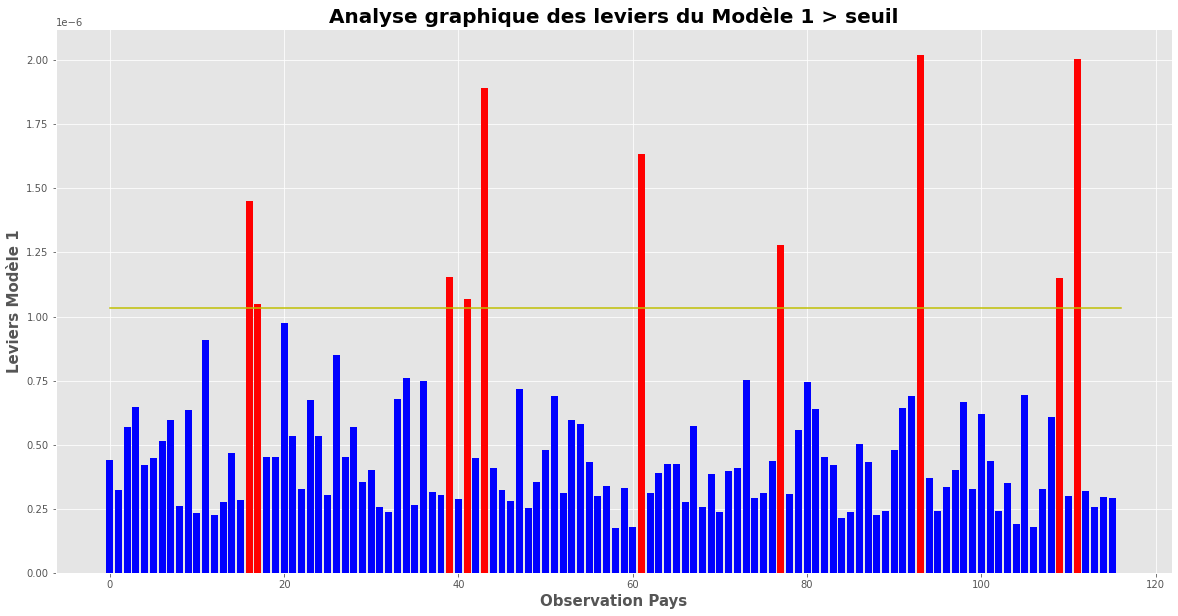

In [ ]:
#Visualisation des leviers du Mod√®le 1 par pays avec repr√©sentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_levier.loc[analyse_levier['levier_modele1'] <= seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_modele1'] <= seuil_levier]['levier_modele1'], color='b')
plt.bar(analyse_levier.loc[analyse_levier['levier_modele1'] > seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_modele1'] > seuil_levier]['levier_modele1'], color='r')
plt.plot([0, 116], [seuil_levier, seuil_levier], color='y')

plt.xlabel('Observation Pays', fontsize=15, fontweight='bold')
plt.ylabel('Leviers Mod√®le 1', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des leviers du Mod√®le 1 > seuil', fontsize=20, fontweight='bold')

plt.savefig('levier_model1.jpg')
plt.show()

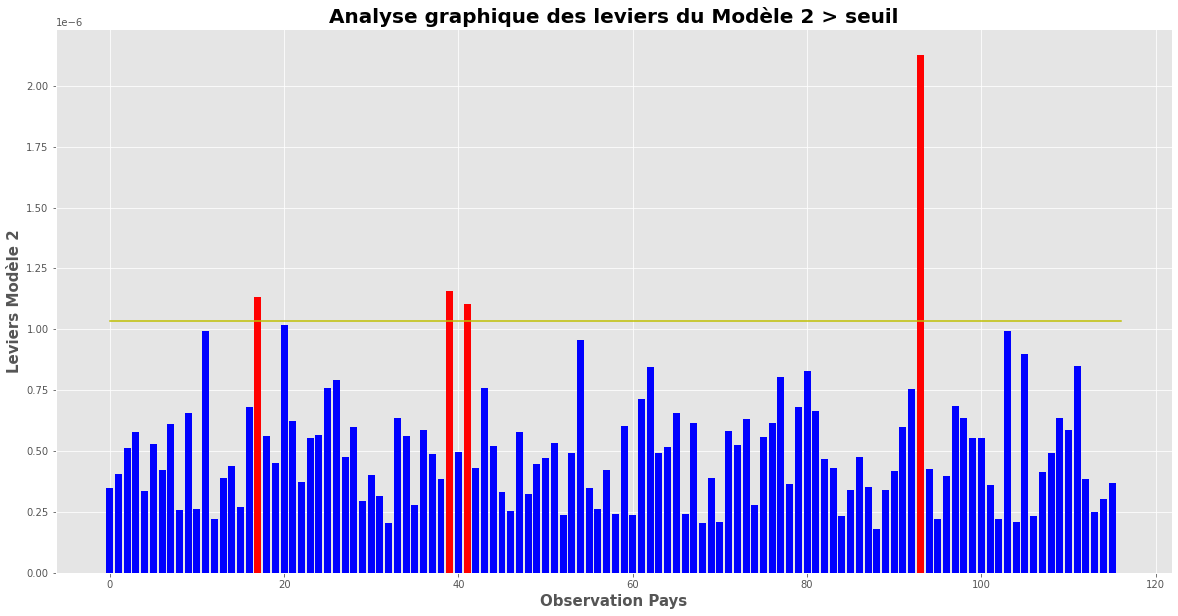

In [ ]:
#Visualisation des leviers du Mod√®le 2 par pays avec repr√©sentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_levier.loc[analyse_levier['levier_modele2'] <= seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_modele2'] <= seuil_levier]['levier_modele2'], color='b')
plt.bar(analyse_levier.loc[analyse_levier['levier_modele2'] > seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_modele2'] > seuil_levier]['levier_modele2'], color='r')
plt.plot([0, 116], [seuil_levier, seuil_levier], color='y')

plt.xlabel('Observation Pays', fontsize=15, fontweight='bold')
plt.ylabel('Leviers Mod√®le 2', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des leviers du Mod√®le 2 > seuil', fontsize=20, fontweight='bold')

plt.savefig('levier_model2.jpg')
plt.show()


Il faut pouvoir jongler entre des observations graphiques et des m√©triques qui permettent de quantifier avec plus de pr√©cision une tendance, etc‚Ä¶ Ici, il est n√©cessaire de ne pas s'arr√™ter aux pr√©c√©dents diagrammes, voyons imm√©diatement √† quoi correspondent ces leviers, quels sont ces pays hors seuil?

In [ ]:
#Liste des pays dont le levier est sup√©rieur au seuil fix√©
print('Pays issus du Mod√®le 1 sans log.')
display(analyse_levier[analyse_levier['levier_modele1'] > seuil_levier]['country'])
print('Pays issus du Mod√®le 2 avec log.')
display(analyse_levier[analyse_levier['levier_modele2'] > seuil_levier]['country'])

Pays issus du Mod√®le 1 sans log.


16              Canada
17     Central African
39           Guatemala
41            Honduras
43             Iceland
61          Luxembourg
77              Norway
93        South Africa
109     United Kingdom
111      United States
Name: country, dtype: object

Pays issus du Mod√®le 2 avec log.


17    Central African
39          Guatemala
41           Honduras
93       South Africa
Name: country, dtype: object

In [ ]:
#Pourcentage de pays hors seuil levier
print("Mod√®le 1: " + str(round(len(analyse_levier[analyse_levier['levier_modele1'] 
                    > seuil_levier])/len(analyse_levier['levier_modele1'])*100, 2)) + '%')
print("Mod√®le 2 (avec log): " + str(round(len(analyse_levier[analyse_levier['levier_modele2'] 
                    > seuil_levier])/len(analyse_levier['levier_modele2'])*100, 2)) + '%')

Mod√®le 1: 8.62%
Mod√®le 2 (avec log): 3.45%


Le Mod√®le 2, avec un R¬≤ = 0.728, est globalement significatif √† 4%. En comparaison le premier Mod√®le, sans logarithme, se r√©v√®le √™tre moins significatif. Son R¬≤ = 0.496 plus faible mais avec le diagnostic des leviers, on constate √©galement qu'un plus grand nombre de pays viennent influencer le Mod√®le 1, donc sa performance est moins optimale.

**Analyse des r√©sidus studentis√©s (standardis√©s) :**

Le seuil pour les r√©sidus studentis√©s est une loi de Student √† n-p-1 degr√©s de libert√©.

**Il n√©cessaire d'observer le r√¥le conjoint du levier et du r√©sidu standardis√©**.

In [ ]:
#Int√©gration de deux nouvelles variables propres √† chaque mod√®le
analyse['rstudent_modele1'] = modele1.get_influence().resid_studentized_internal
analyse['rstudent_modele2'] = modele2.get_influence().resid_studentized_internal

seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [ ]:
#Agr√©gation des donn√©es selon leurs pays, vision simplifi√©e du couple pays-individu/rstudent
#Simplification du dataframe pour une visualisation et interpr√©tation plus rapide
analyse_rstudent = analyse.groupby(['country', 'quantile']).mean().reset_index()

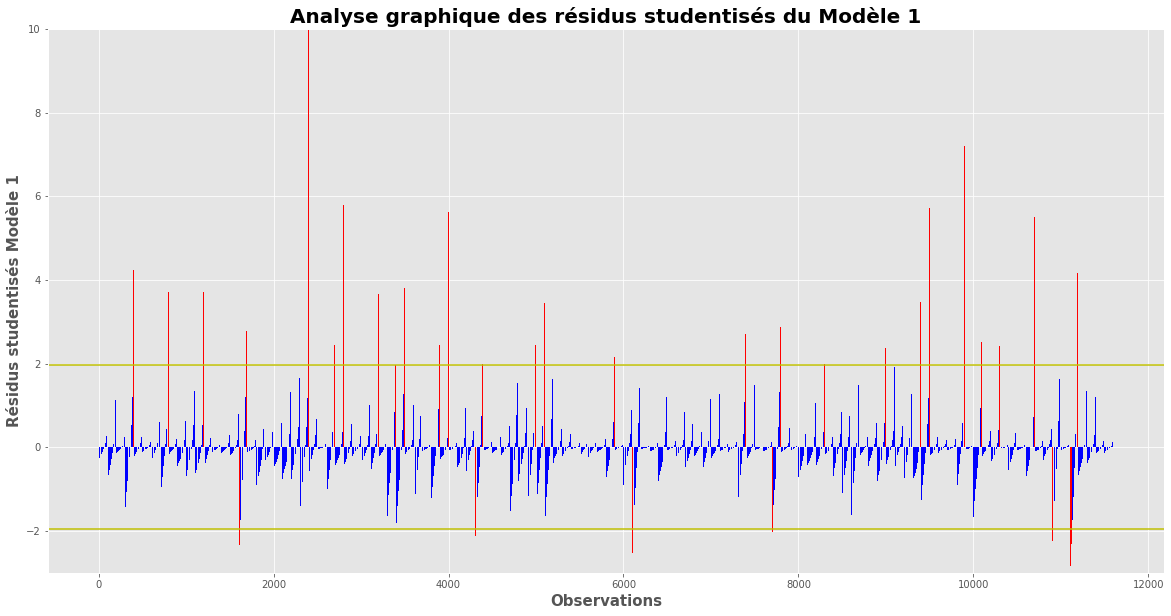

In [ ]:
#Visualisation globale des r√©sidus studentis√©s du Mod√®le 1 avec repr√©sentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_rstudent[(analyse_rstudent['rstudent_modele1'] <= seuil_rstudent) & 
                            (analyse_rstudent['rstudent_modele1'] >= -seuil_rstudent)]['country'].index, 
        analyse_rstudent[(analyse_rstudent['rstudent_modele1'] <= seuil_rstudent) &
                            (analyse_rstudent['rstudent_modele1'] >= -seuil_rstudent)]['rstudent_modele1'], color='b')

plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele1'] > seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele1'] > seuil_rstudent]['rstudent_modele1'], color='r')
plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele1'] < -seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele1'] < -seuil_rstudent]['rstudent_modele1'], color='r')


plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('R√©sidus studentis√©s Mod√®le 1', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des r√©sidus studentis√©s du Mod√®le 1', fontsize=20, fontweight='bold')

plt.ylim(-3, 10)
plt.savefig('residus_studentises_modele1.jpg')
plt.show()

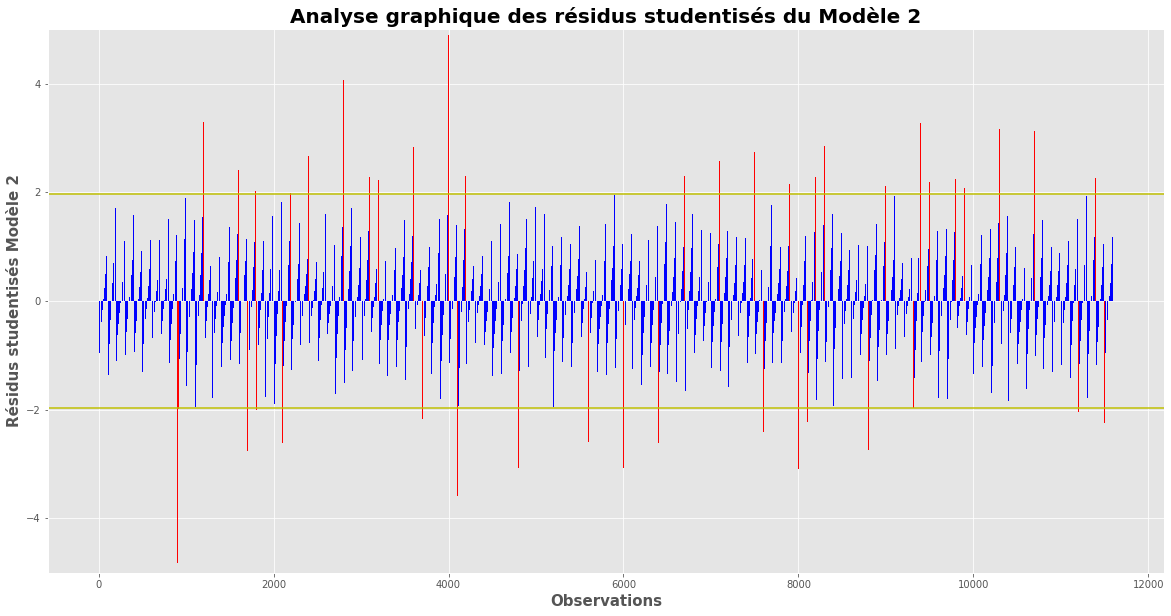

In [ ]:
#Visualisation globale des r√©sidus studentis√©s du Mod√®le 2 avec repr√©sentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_rstudent[(analyse_rstudent['rstudent_modele2'] <= seuil_rstudent) & 
                            (analyse_rstudent['rstudent_modele2'] >= -seuil_rstudent)]['country'].index, 
        analyse_rstudent[(analyse_rstudent['rstudent_modele2'] <= seuil_rstudent) &
                            (analyse_rstudent['rstudent_modele2'] >= -seuil_rstudent)]['rstudent_modele2'], color='b')

plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele2'] > seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele2'] > seuil_rstudent]['rstudent_modele2'], color='r')
plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele2'] < -seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele2'] < -seuil_rstudent]['rstudent_modele2'], color='r')

plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('R√©sidus studentis√©s Mod√®le 2', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des r√©sidus studentis√©s du Mod√®le 2', fontsize=20, fontweight='bold')

plt.ylim(-5, 5)
plt.savefig('residus_studentises_model2.jpg')
plt.show()

**L'approche comparative visuelle n'apporte pas de conclusion significative. Il y a forc√©ment des r√©sidus hors seuil, mais √† partir des graphiques l'analyse s'arr√™te l√†. Voyons en pourcentage ce que peut repr√©senter ces observations plus influentes que les autres.**

In [ ]:
#Comparaison du nombre de valeurs influentes sur les deux mod√®les
print(str(len(analyse_rstudent[(analyse_rstudent['rstudent_modele1'] > seuil_rstudent) | 
                 (analyse_rstudent['rstudent_modele1'] < -seuil_rstudent)])), 
                 'Valeurs influentes dans le Mod√®le 1 (sans log)')

print(str(len(analyse_rstudent[(analyse_rstudent['rstudent_modele2'] > seuil_rstudent) | 
                 (analyse_rstudent['rstudent_modele2'] < -seuil_rstudent)])), 
                 'Valeurs influentes dans le Mod√®le 2 (avec log)')

410 Valeurs influentes dans le Mod√®le 1 (sans log)
636 Valeurs influentes dans le Mod√®le 2 (avec log)


In [ ]:
#Pourcentage des observations les plus influentes (hors seuil)
print("Mod√®le 1: " + str((round(410 / len(analyse_rstudent['rstudent_modele1'])*100, 2))) + "%")
print("Mod√®le 2 (avec log): " + str((round(635 / len(analyse_rstudent['rstudent_modele2'])*100, 2))) + "%")

Mod√®le 1: 3.53%
Mod√®le 2 (avec log): 5.47%


**Les deux mod√®les propos√©s pr√©sentent entre 3 et 5% de r√©sidus**, cel√† doit-√™tre combin√© avec les valeurs influentes trouv√©es avec le crit√®re des leviers. 

**Le Mod√®le 2 avec logarithme reste le favori,** **la variance est certe mieux expliqu√©e, mais d√©sormais nous avons une id√©e plus pr√©cises des pays influents via les leviers, c'est-√†-dire environ 4% sur le premier mod√®le, mais √©galement une id√©e de la part des observations dont les r√©sidus standardis√©s approchent les 6%.**

**Analyse de la distance de Cook :**

**Toujours √† l'aide de statsmodels la distance de Cook permettra de mieux estimer les influents.**

In [ ]:
influence1 = modele1.get_influence()
influence2 = modele2.get_influence()

cooks_d1 = influence1.cooks_distance[0]
cooks_d2 = influence2.cooks_distance[0]

In [ ]:
#Int√©gration des distances de Cook dans "analyse"
analyse['dcooks1'] = cooks_d1
analyse['dcooks2'] = cooks_d2

In [ ]:
#Seuil de la distance de Cook est de n-p. 
seuil_dcook = 4/(n-p)

In [ ]:
#Simplification des donn√©es propres aux distances de Cook des deux mod√®les
analyse_dcook = analyse.groupby(['country', 'quantile']).mean().reset_index()

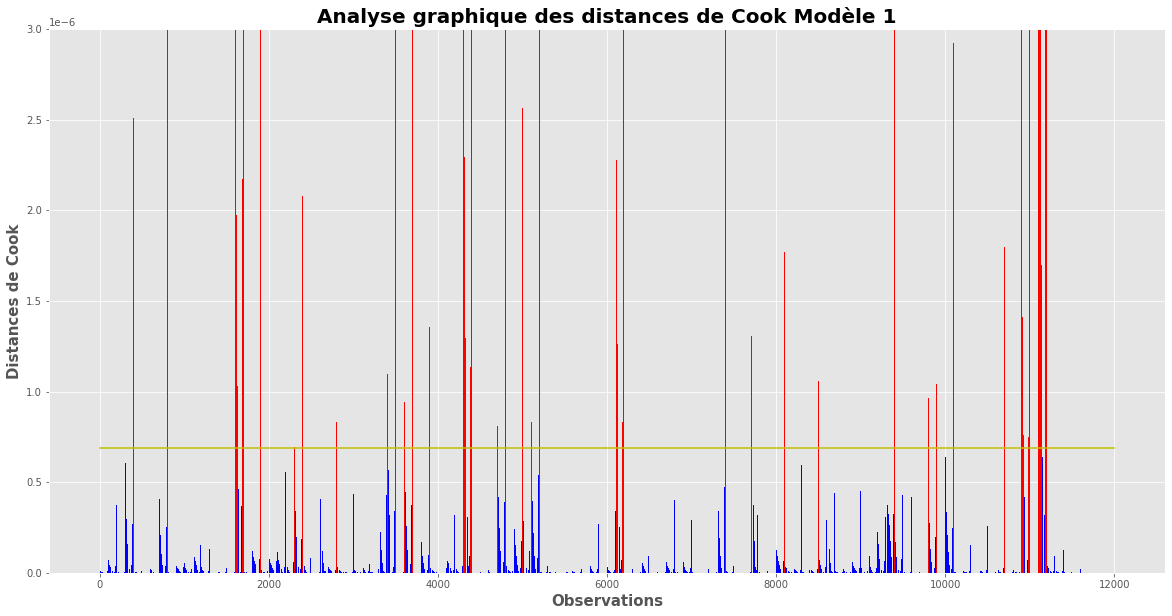

In [ ]:
#Visualisation globale des distances de Cook du Mod√®le 1 avec repr√©sentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_dcook.loc[analyse_dcook['dcooks1'] < seuil_dcook]['country'].index,
        analyse_dcook.loc[analyse_dcook['dcooks1'] < seuil_dcook]['dcooks1'], color='b')
plt.bar(analyse_dcook.loc[analyse_dcook['dcooks1'] >= seuil_dcook]['country'].index,
        analyse_dcook.loc[analyse_dcook['dcooks1'] >= seuil_dcook]['dcooks1'], color='r')

plt.plot([0, 12000], [seuil_dcook, seuil_dcook], color='y')
plt.ylim(0, 0.000003)

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Distances de Cook', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des distances de Cook Mod√®le 1', fontsize=20, fontweight='bold')

plt.savefig('dcook_model1.jpg')
plt.show()

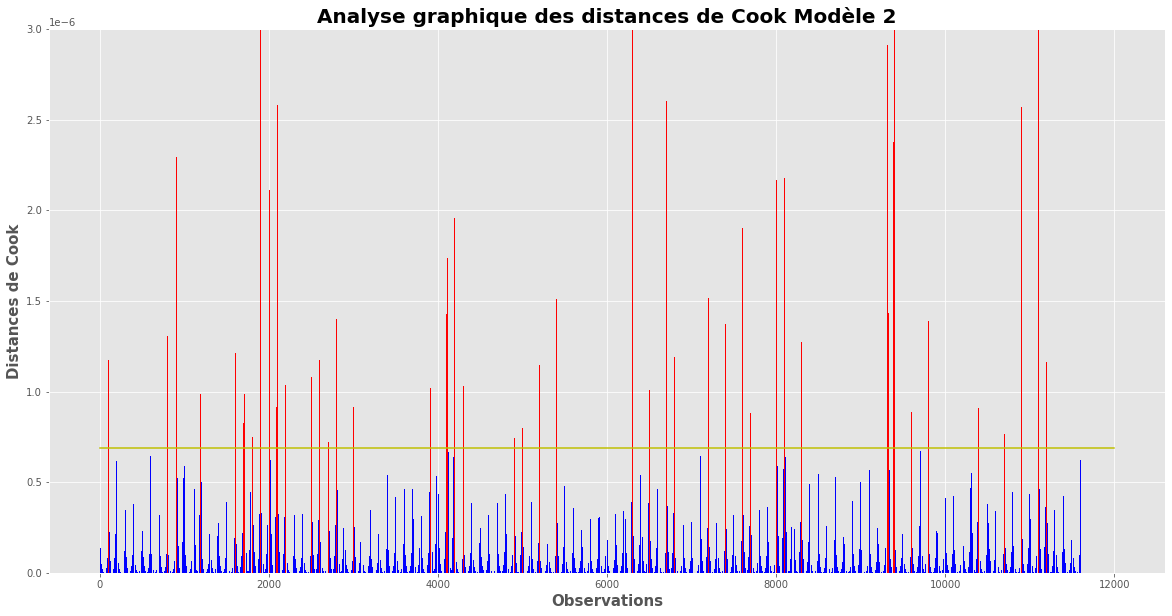

In [ ]:
#Visualisation globale des distances de Cook du Mod√®le 2 avec repr√©sentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_dcook.loc[analyse_dcook['dcooks2'] < seuil_dcook]['country'].index,
        analyse_dcook.loc[analyse_dcook['dcooks2'] < seuil_dcook]['dcooks2'], color='b')
plt.bar(analyse_dcook.loc[analyse_dcook['dcooks2'] >= seuil_dcook]['country'].index,
        analyse_dcook.loc[analyse_dcook['dcooks2'] >= seuil_dcook]['dcooks2'], color='r')

plt.plot([0, 12000], [seuil_dcook, seuil_dcook], color='y')
plt.ylim(0, 0.000003)

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Distances de Cook', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des distances de Cook Mod√®le 2', fontsize=20, fontweight='bold')

plt.savefig('dcook_model2.jpg')
plt.show()

In [ ]:
#Nombre d'observations influentes sur le crit√®re de la distance de Cook
print(str(len(analyse_dcook[analyse_dcook['dcooks1'] > seuil_dcook])), 'valeurs influentes dans le Mod√®le 1')
print(str(len(analyse_dcook[analyse_dcook['dcooks2'] > seuil_dcook])), 'valeurs influentes dans le Mod√®le 2')

585 valeurs influentes dans le Mod√®le 1
662 valeurs influentes dans le Mod√®le 2


In [ ]:
#Pourcentage des observations les plus influentes (hors seuil)
print("Mod√®le 1: " + str((round(586 / len(analyse_dcook)*100, 2))) + "%")
print("Mod√®le 2 (avec log): " + str((round(662 / len(analyse_dcook)*100, 2))) + "%")

Mod√®le 1: 5.05%
Mod√®le 2 (avec log): 5.71%


**Sur ce crit√®re de distance de Cook, les deux mod√®les sont plus ou moins identiques, on sait d√©sormais que cel√† repr√©sente 5% des observations.**

On a vu que passer les variables au logarithme renforce la robustesse du mod√®le, et que les variables n'apportant pas de variance expliqu√©e peuvent au contraire renforcer la colin√©arit√©

**Am√©lioration du mod√®le le plus performant en incluant la classe de revenu des parents**

**Le pr√©c√©dent mod√®le en logarithme (ln) peut sans doute √™tre encore optimis√© en incluant une nouvelle variable, ici la classe de revenu des parents.** 

**Le mod√®le qui ressortira sera normalement plus performant, ce qui nous donnera √©galement la part d'influence que peut avoir ce type de donn√©es sur le revenu des individus.**



In [ ]:
#Mod√®le de R√©gression lin√©aire avec ajout d'une variable suppl√©mentaire 
modele2_parents = smf.ols('ln_income ~ gini + ln_y_parent + ln_income_avg', data=df_wid500).fit()
print(modele2_parents.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 5.182e+06
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:32:04   Log-Likelihood:            -6.3237e+06
No. Observations:             5800000   AIC:                         1.265e+07
Df Residuals:                 5799996   BIC:                         1.265e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4732      0.003    162.862

**En ajoutant juste la classe parents, on obtient une variance expliqu√©e de 72% √©gale √† celle obtenue plus t√¥t sans cette variable. Income_mean_ln et gini_ln sont toujours aussi significatives, mais la classe parents obtient une P>|t| de 88%, indiquant une probable absence de significativ√© de cette variable.**



**Sans logarithme**


In [ ]:
modele2_parents = smf.ols('income ~ gini + ln_y_parent + ln_income_avg', data=df_wid500).fit()
print(modele2_parents.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 1.257e+06
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:32:06   Log-Likelihood:            -5.9847e+07
No. Observations:             5800000   AIC:                         1.197e+08
Df Residuals:                 5799996   BIC:                         1.197e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.062e+04     29.575  -1035.458

**Sans logarithme, la variance expliqu√©e est legerement faible que la m√™me pr√©c√©demment obtenue, qu'on ajoute c_i_parent ou non. L'indice de Gini garde la m√™me absence de significativit√©, comme c_i_parent.

**Cette fois encore, le mod√®le avec les √©chelles logaritmiques est meilleur sur tous les indicateurs. Nous allons donc consid√©rer ce dernier mod√®le ln.**

Pourcentage de variance expliqu√©e par ce mod√®le

**Sur ce dernier mod√®le, le pourcentage de variance expliqu√© est de 72.4 %, ce qui en fait, √† priori, le meilleur mod√®le pour cette analyse.** 

**Pourcentage de variance expliqu√©e par ce mod√®le**


L'√©quation d'analyse de variance pour ce mod√®le est la suivante : 
Pour obtenir ces indicateurs, nous allons afficher la table d'analyse de variances avec Statsmodels, puis calculer les 
 
 (qui correspondent √©galement au R¬≤) : 

In [ ]:
anova_table_global_ln = sm.stats.anova_lm(modele2_parents, typ=2)
anova_table_global_ln["eta_sq"] = anova_table_global_ln[:-1]['sum_sq']/sum(anova_table_global_ln['sum_sq'])
anova_table_global_ln

sum_sq         df             F    PR(>F)        eta_sq
gini           3.013457e+12        1.0  5.611223e+04  0.000000  6.146854e-03
ln_y_parent    1.253714e+08        1.0  2.334485e+00  0.126537  2.557328e-07
ln_income_avg  1.757466e+14        1.0  3.272499e+06  0.000000  3.584882e-01
Residual       3.114836e+14  5799996.0           NaN       NaN           NaN

In [ ]:
var_exp_pays_ln_y_parent = round(sum(anova_table_global_ln[0:-1]["eta_sq"])*100,2)
print("Le pourcentage de la variance expliqu√©e par le pays de naissance et la classe des parents est donc de :",var_exp_pays_ln_y_parent,"%")

Le pourcentage de la variance expliqu√©e par le pays de naissance et la classe des parents est donc de : 36.46 %


In [ ]:
var_exp_model_2 = round((modele2_parents.ess / modele2_parents.centered_tss)*100,2)
var_exp_autres_2 = round(var_exp_model_2 - var_exp_pays_ln_y_parent,2)
print("Le pourcentage de la variance expliqu√©e par les autres facteurs non consid√©r√©s est donc de :",var_exp_autres_2,"%")

Le pourcentage de la variance expliqu√©e par les autres facteurs non consid√©r√©s est donc de : 2.93 %


In [ ]:
#Variance totale SCT
modele2_parents.centered_tss

513948083183559.3

In [ ]:
#Variance expliqu√©e SCE
modele2_parents.ess

202464491615516.62

In [ ]:
#Variance r√©siduelle SCR
modele2_parents.ssr

311483591568042.7

** Tests sur ce dernier mod√®le**


In [ ]:
#Param√®tres n√©cessaires au lancement du diagnostic
alpha = .05        #test niveau 5%
n = len(df_wid500) #nombre d'individus de l'√©chantillon
p = 4              #nombre de variables

#Nouveau dataframe d'√©tude du mod√®le 
diagnostic = df_wid500.copy()
diagnostic.head()

ln_y_parent   residus country_code  ...        pj  ln_income  ln_income_avg
0     0.433980 -1.778073          ALB  ...  0.815874   6.591534       8.004643
1    -0.936572  0.358816          ALB  ...  0.815874   6.820739       8.004643
2     0.594741  0.148855          ALB  ...  0.815874   6.918612       8.004643
3    -0.770170  0.312035          ALB  ...  0.815874   6.991092       8.004643
4     0.024164  1.833999          ALB  ...  0.815874   7.032359       8.004643

[5 rows x 12 columns]

In [ ]:
#Cr√©ation de la variable levier
diagnostic['levier'] = modele2_parents.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

In [ ]:
#Agr√©gation des donn√©es selon leurs pays, vision simplifi√©e du couple pays/levier
#Simplification du dataframe pour une visualisation et interpr√©tation plus rapide
diagnostic_levier = diagnostic.groupby('country').mean().reset_index()

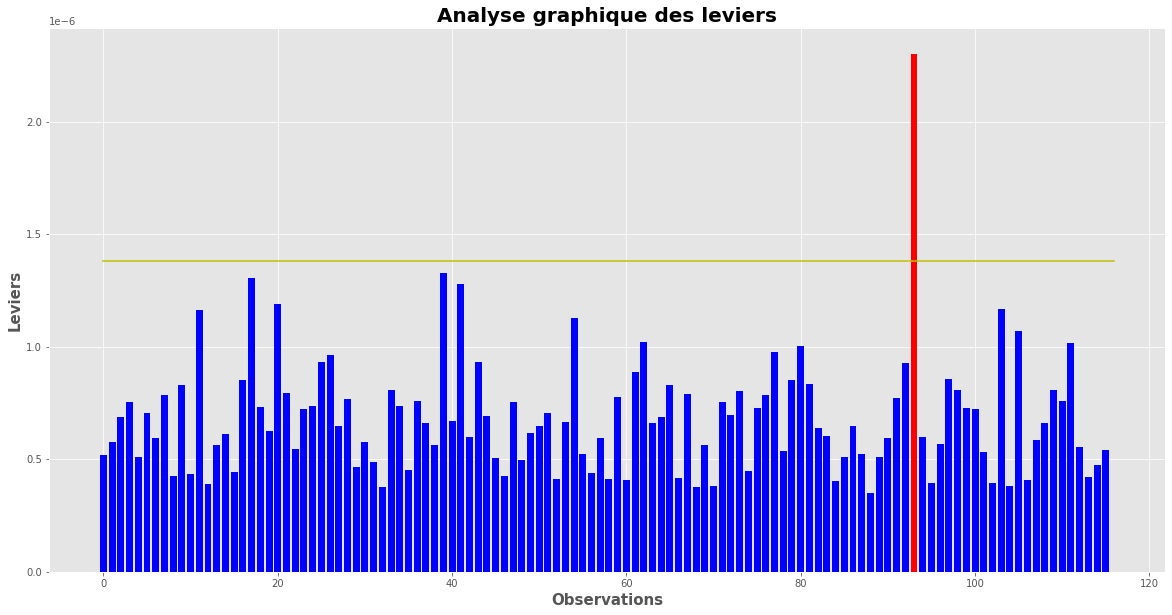

In [ ]:
#Visualisation des leviers par pays avec repr√©sentation du seuil
plt.figure(figsize=(20,10))

plt.bar(diagnostic_levier[diagnostic_levier['levier'] <= seuil_levier]['country'].index,
        diagnostic_levier[diagnostic_levier['levier'] <= seuil_levier]['levier'], color='b')
plt.bar(diagnostic_levier[diagnostic_levier['levier'] > seuil_levier]['country'].index,
        diagnostic_levier[diagnostic_levier['levier'] > seuil_levier]['levier'], color='r')
plt.plot([0, 116], [seuil_levier, seuil_levier], color='y')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Leviers', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des leviers', fontsize=20, fontweight='bold')

plt.savefig('leviers_last_model.jpg')
plt.show()

In [ ]:
#Identification du pays outlier sur le crit√®re des leviers
diagnostic_levier[diagnostic_levier['levier'] > seuil_levier]['country']

93    South Africa
Name: country, dtype: object

Ce n'est pas surprenant, il faut noter qu'en premi√®re partie de l'√©tude, dans la visualisation des distributions de nos variables, ce pays avait √©t√© identifi√© comme tel car son coefficient de Gini √©tait bien trop √©lev√© par rapport aux autres pays...

**Analyse des r√©sidus studentis√©s**

In [ ]:
#Int√©gration de la variable li√©e aux r√©sidus
diagnostic['rstudent'] = modele2_parents.get_influence().resid_studentized_internal

seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [ ]:
#Agr√©gation des donn√©es selon leurs pays, vision simplifi√©e du couple pays-individu/rstudent
#Simplification du dataframe pour une visualisation et interpr√©tation plus rapide
diagnostic_rstudent = diagnostic.groupby(['country', 'quantile']).mean().reset_index()

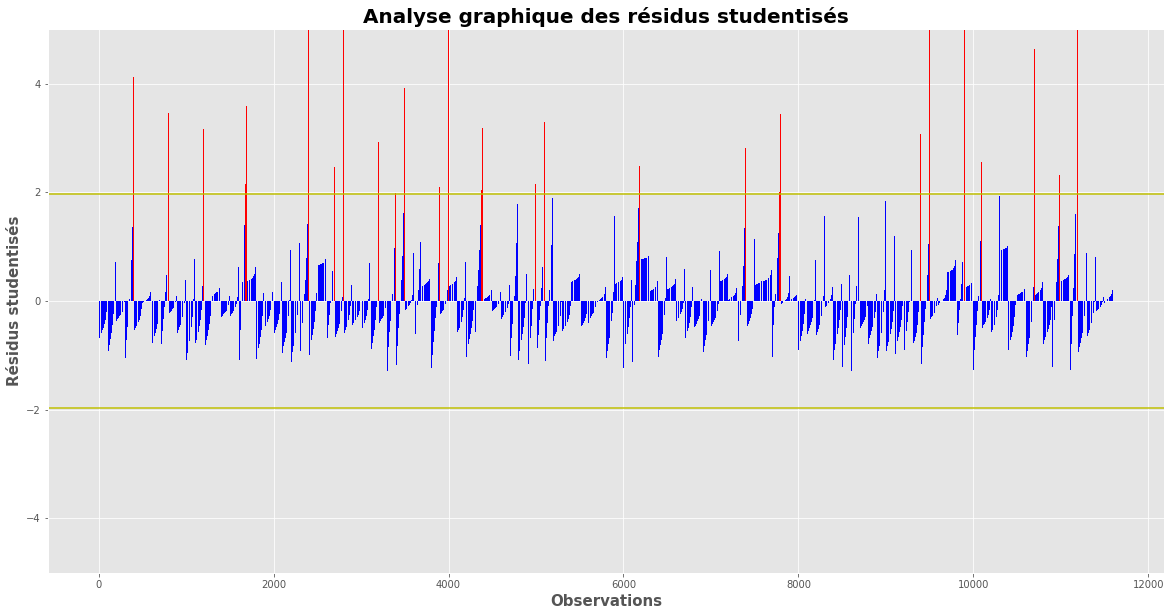

In [ ]:
#Visualisation globale des r√©sidus studentis√©s avec repr√©sentation du seuil
plt.figure(figsize=(20,10))

plt.bar(diagnostic_rstudent[(diagnostic_rstudent['rstudent'] <= seuil_rstudent) & 
                            (diagnostic_rstudent['rstudent'] >= -seuil_rstudent)]['country'].index, 
        diagnostic_rstudent[(diagnostic_rstudent['rstudent'] <= seuil_rstudent) &
                            (diagnostic_rstudent['rstudent'] >= -seuil_rstudent)]['rstudent'], color='b')

plt.bar(diagnostic_rstudent[diagnostic_rstudent['rstudent'] > seuil_rstudent]['country'].index, 
        diagnostic_rstudent[diagnostic_rstudent['rstudent'] > seuil_rstudent]['rstudent'], color='r')
plt.bar(diagnostic_rstudent[diagnostic_rstudent['rstudent'] < -seuil_rstudent]['country'].index, 
        diagnostic_rstudent[diagnostic_rstudent['rstudent'] < -seuil_rstudent]['rstudent'], color='r')

plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('R√©sidus studentis√©s', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des r√©sidus studentis√©s', fontsize=20, fontweight='bold')

plt.ylim(-5, 5)
plt.savefig('residus_studentises_last_model.jpg')
plt.show()

In [ ]:
#Pourcentage des observations hors seuil sur le crit√®re des r√©sidus standardis√©s
print(str(len(diagnostic_rstudent[(diagnostic_rstudent['rstudent'] > seuil_rstudent) | 
                 (diagnostic_rstudent['rstudent'] < -seuil_rstudent)])), 
                 'valeurs influentes dans le Mod√®le')
print('soit ' + str(round(477/len(diagnostic_rstudent), 2)*100) + '% valeurs plus influentes que les autres')

336 valeurs influentes dans le Mod√®le
soit 4.0% valeurs plus influentes que les autres


**Analyse de la distance de Cook**

In [ ]:
influence = modele2_parents.get_influence()

cooks_d = influence1.cooks_distance[0]

In [ ]:
#Int√©gration des distances de Cook dans "diagnostic"
diagnostic['dcooks'] = cooks_d

In [ ]:
#Seuil de la distance de Cook est de n-p. 
seuil_dcook = 4/(n-p)

In [ ]:
#Simplification des donn√©es propres √† l'analyse de la distance de Cook
diagnostic_dcook = diagnostic.groupby(['country', 'quantile']).mean().reset_index()

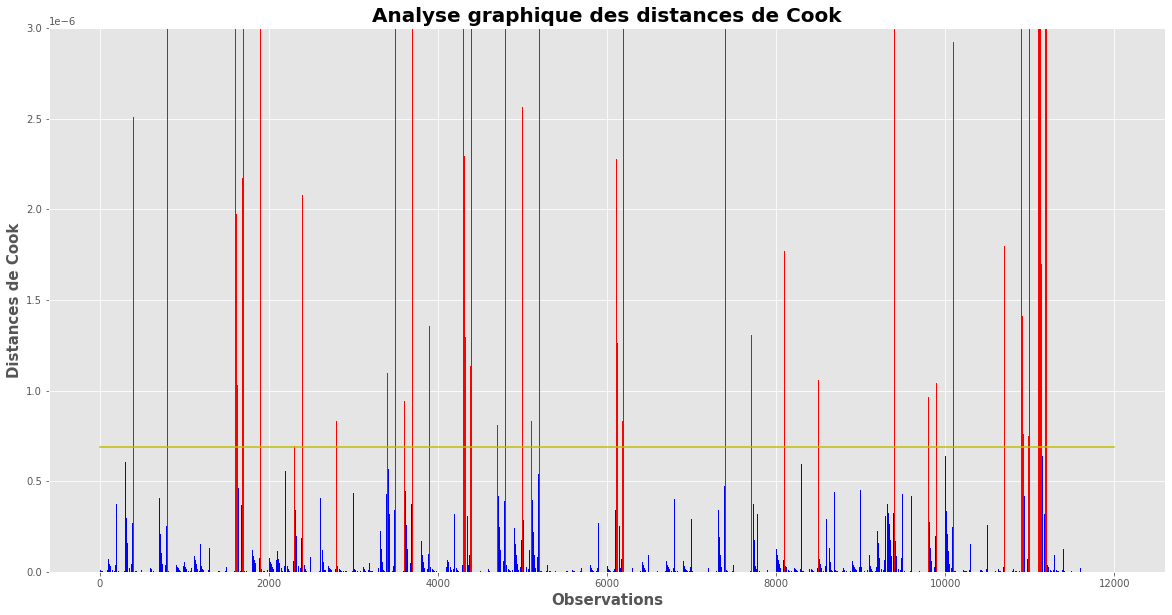

In [ ]:
#Visualisation globale des distances de Cook avec repr√©sentation du seuil
plt.figure(figsize=(20,10))

plt.bar(diagnostic_dcook[diagnostic_dcook['dcooks'] < seuil_dcook]['country'].index,
        diagnostic_dcook[diagnostic_dcook['dcooks'] < seuil_dcook]['dcooks'], color='b')
plt.bar(diagnostic_dcook[diagnostic_dcook['dcooks'] >= seuil_dcook]['country'].index,
        diagnostic_dcook[diagnostic_dcook['dcooks'] >= seuil_dcook]['dcooks'], color='r')

plt.plot([0, 12000], [seuil_dcook, seuil_dcook], color='y')
plt.ylim(0, 0.000003)

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Distances de Cook', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des distances de Cook', fontsize=20, fontweight='bold')

plt.savefig('dcook_last_model.jpg')
plt.show()

In [ ]:
#Pourcentage des observations hors seuil sur le crit√®re de la distance de Cook
print(str(len(diagnostic_dcook[diagnostic_dcook['dcooks'] >= seuil_dcook])) 
      + ' valeurs atypiques sur le crit√®re de d. Cook')
print('soit ' + str(round(586/len(diagnostic_dcook), 2)*100) + '% des valeurs sont plus atypiques selon ce seuil.')

585 valeurs atypiques sur le crit√®re de d. Cook
soit 5.0% des valeurs sont plus atypiques selon ce seuil.


**Test de colin√©arit√© du dernier mod√®le**


Ci-dessous test de v√©rification de la colin√©arit√© approch√©e de nos variables.

In [ ]:
variables = modele2_parents.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0649101051463263, 1.0000000599834318, 1.0649100491303438]

**Aucun probl√®me de colin√©arit√©, en effet nos coefficients sont inf√©rieurs √† 10 et m√™me √† 5.**

**L‚Äôhomosc√©dasticit√© par un test de Breusch-Pagan**

On peut √©galement tester l‚Äôhomosc√©dasticit√©, la constance de la variance des r√©sidus :



In [ ]:
__, pval, __, f_pval = sms.het_breuschpagan(modele2_parents.resid, modele2_parents.model.exog)
print('p value test Breusch-Pagan:', pval)

p value test Breusch-Pagan: 0.0


**Rejet de l'hypoth√®se H0 (les variances sont constantes), il y a h√©t√©rosc√©dasticit√© des residus.**
Ceci √©tant, le mod√®le de regression lin√©aire multiple est robuste pour les grands √©chantillons, ce qui est le cas dans notre contexte. Le mod√®le est capable de supporter des √©carts important aux hypoth√®ses homosc√©dastique et gaussienne.

**R√©ponse √† la derni√®re question sur l'indice de Gini**
 En observant le coefficient de r√©gression associ√© √† l‚Äôindice de Gini, peut-on affirmer que le fait de vivre dans un pays plus in√©galitaire favorise plus de personnes qu‚Äôil n‚Äôen d√©favorise ?

Comme nous l'avons d√©j√† vu, plus l'indice de Gini est √©lev√©, plus la r√©partition du pays est in√©galitaire. De ce fait, une petite proportion de la population d√©tient la plus grosse part des richesses. Les √©carts dans les salaires sont tr√®s √©lev√©s avec des revenus par individus faible.

L'exemple du pr√©c√©dent mod√®le est r√©v√©lateur, on peut comprendre ce lien par le coefficient n√©gatif au sein du mod√®le.


